# Seminar in Climatology


The current extreme heat is due to an anticyclone, a high-pressure system, that is dominating the upper atmosphere over southern Europe. As well as compressing and warming air, high-pressure systems are associated with reduced cloud cover, allowing more solar radiation to reach the ground. This allows for substantial heating of Earth’s surface by the sun, heat which then moves upwards into the atmosphere. The long days and short nights of summer mean that this heating effect is maximised. (Copernicus)

Large scale winds, advection, blowing hot air for example from northern Africa into Europe, can also contribute to heatwaves. For the current heatwave this factor seems to be less important. (Copernicus)

In [1]:
# General libs for file paths, data extraction, etc
from glob import glob
from pathlib import Path
from os.path import basename
import zipfile # To extract zipfiles
import urllib3 
urllib3.disable_warnings() # Disable warnings for data download via API

# CDS API
import cdsapi

# Libraries for working with multi-dimensional arrays
import numpy as np
import xarray as xr
import xarray.plot as xplot
import pandas as pd

# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

from datetime import datetime

# ERA-5

In [2]:
ERA_data = xr.open_dataset('../data/ERA_data_july_heatwaves.nc')

In [3]:
ERA_data.dims

FrozenMappingWarningOnValuesAccess({'time': 68, 'lat': 121, 'lon': 1440, 'level': 2})

In [56]:
ERA_data.variables

Frozen({'u10': <xarray.Variable (time: 68, lat: 121, lon: 1440)> Size: 47MB
[11848320 values with dtype=float32]
Attributes:
    long_name:  10 metre U wind component
    units:      m s**-1, 'v10': <xarray.Variable (time: 68, lat: 121, lon: 1440)> Size: 47MB
[11848320 values with dtype=float32]
Attributes:
    long_name:  10 metre V wind component
    units:      m s**-1, 'msl': <xarray.Variable (time: 68, lat: 121, lon: 1440)> Size: 47MB
[11848320 values with dtype=float32]
Attributes:
    standard_name:  air_pressure_at_mean_sea_level
    long_name:      Mean sea level pressure
    units:          Pa, 't2m': <xarray.Variable (time: 68, lat: 121, lon: 1440)> Size: 47MB
[11848320 values with dtype=float32]
Attributes:
    long_name:  2 metre temperature
    units:      K, 'd2m': <xarray.Variable (time: 68, lat: 121, lon: 1440)> Size: 47MB
[11848320 values with dtype=float32]
Attributes:
    long_name:  2 metre dewpoint temperature
    units:      K, 'sp': <xarray.Variable (time: 68, l

In [57]:
ERA_data['t2m']

<xarray.DataArray 't2m' (time: 68, lat: 121, lon: 1440)> Size: 47MB
[11848320 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 544B 2023-07-01 ... 2023-07-17T18:00:00
  * lon      (lon) float32 6kB -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * lat      (lat) float32 484B 20.0 20.25 20.5 20.75 ... 49.25 49.5 49.75 50.0
Attributes:
    long_name:  2 metre temperature
    units:      K

In [58]:
ERA_data['z']

<xarray.DataArray 'z' (time: 68, level: 2, lat: 121, lon: 1440)> Size: 95MB
[23696640 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 544B 2023-07-01 ... 2023-07-17T18:00:00
  * lon      (lon) float32 6kB -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * lat      (lat) float32 484B 20.0 20.25 20.5 20.75 ... 49.25 49.5 49.75 50.0
  * level    (level) int32 8B 850 500
Attributes:
    standard_name:  geopotential
    long_name:      Geopotential
    units:          m**2 s**-2

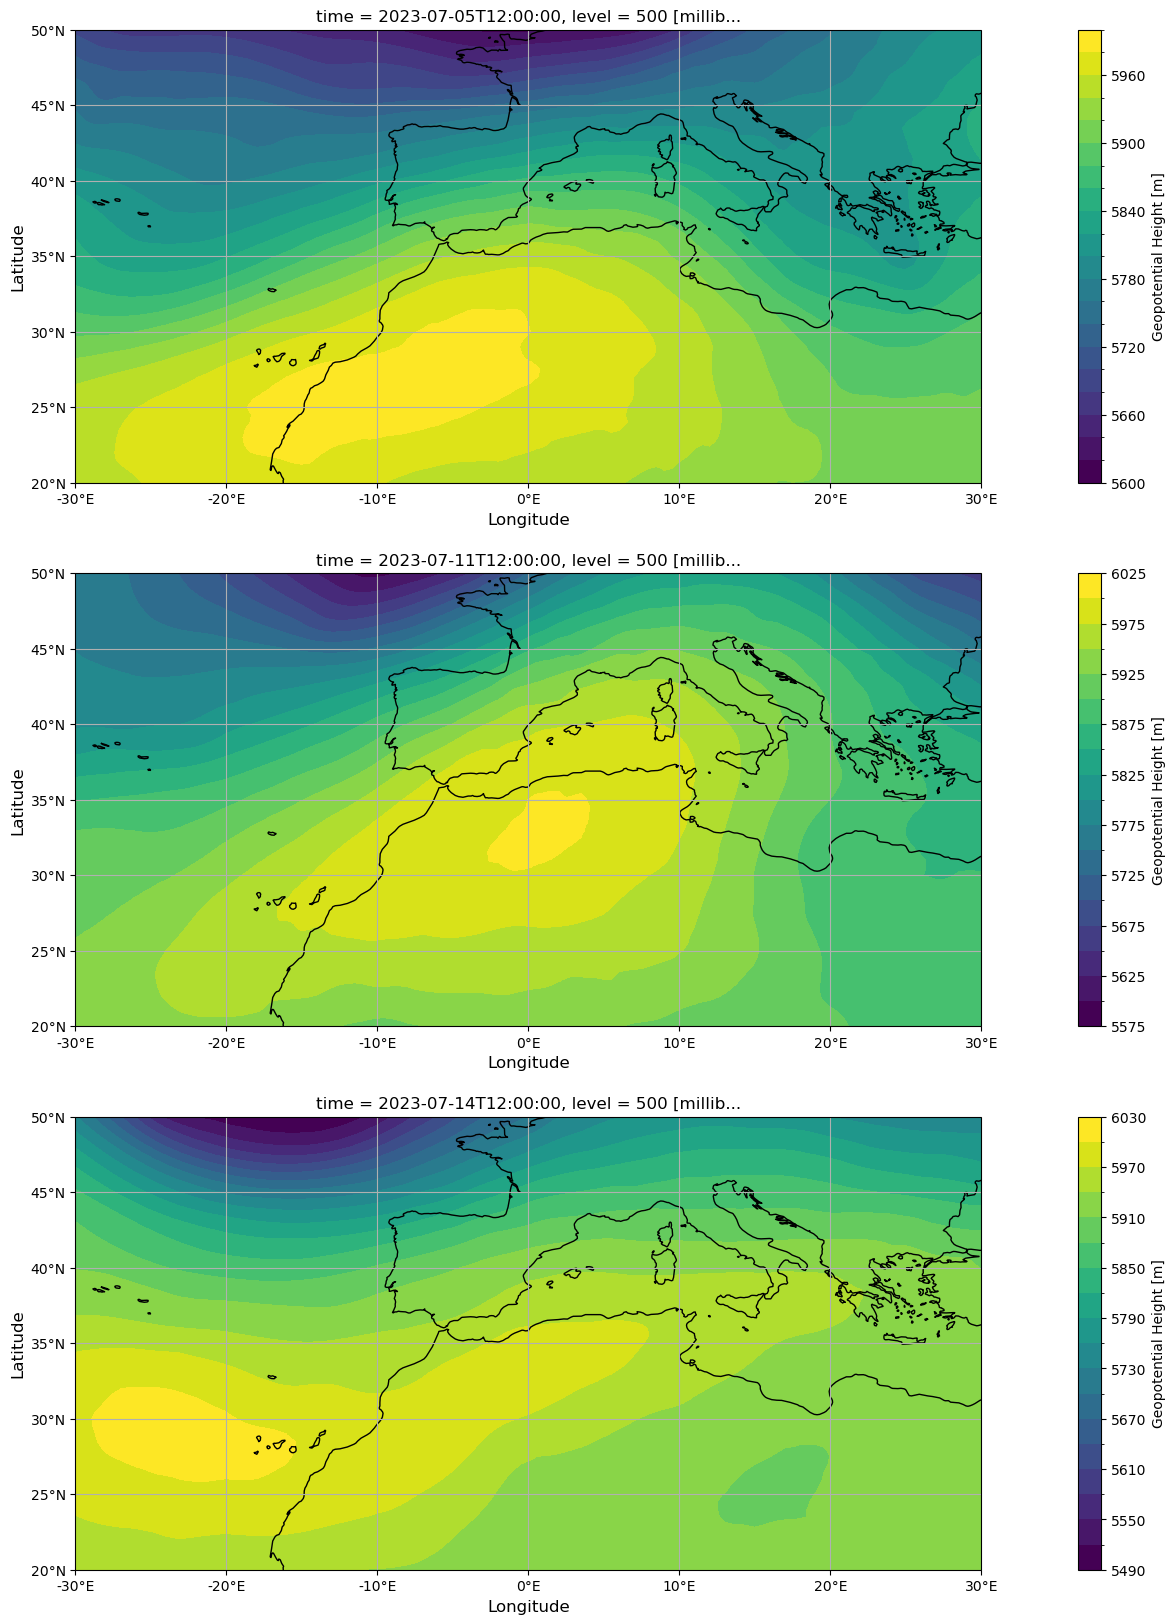

In [95]:
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Select the geopotential data for the 500 hPa level and the specified longitude and latitude ranges
z_500hPa_sliced = ERA_data['z'].sel(level=500, lon=lon_range, lat=lat_range)/9.81

# Select specific timesteps (for example, every second timestep from the first 4 timesteps)
#selected_timesteps = z_500hPa_sliced['time'].isel(time=slice(10, 68, 4))
selected_timesteps = z_500hPa_sliced['time'].isel(time=[18, 42, 54])
#[18, 42, 54]
# Plot the 2-meter temperature for the selected timesteps
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(25, 20), subplot_kw={'projection': ccrs.PlateCarree()})
for i, ax in enumerate(axes.flat):
    plot_data = z_500hPa_sliced.sel(time=selected_timesteps[i])
    xplot.contourf(plot_data, ax=ax, cmap='viridis', levels=20, cbar_kwargs={'label': 'Geopotential Height [m]'})
    # Add coastlines
    ax.coastlines()
    # Draw gridlines only for the bottom and left axes
    ax.gridlines(draw_labels=False)  
    ax.set_ylabel('Latitude', fontsize=12)
    ax.set_yticks(range(20, 51, 5))  
    # Add explicit ticks for the y-axis
    ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
    # Add explicit labels for the y-axis
    ax.set_xlabel('Longitude', fontsize=12)
    # Add explicit ticks for the x-axis with 10 degree step
    ax.set_xticks(np.arange(-30, 31, 10))  
    # Add explicit labels for the x-axis
    ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  

# Save the plot as a PDF file
#plt.savefig('../analysis/ERA_geopot_selected_timesteps.pdf')
# Show the plot
plt.show()

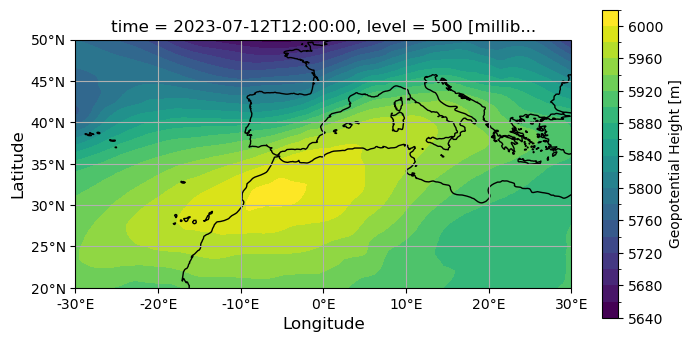

In [319]:
lon_range = slice(-30, 30)
lat_range = slice(20, 50)
# Select the geopotential data for the 500 hPa level and the specified longitude and latitude ranges
z_500hPa_sliced = ERA_data['z'].sel(level=500, lon=lon_range, lat=lat_range) / 9.81

# Select specific timesteps
selected_timesteps = z_500hPa_sliced['time'].isel(time=[46, 48])

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})

# Select the timestep to plot
plot_data = z_500hPa_sliced.sel(time=selected_timesteps[0])  # Change the index to plot different timesteps

# Plot the data
xplot.contourf(plot_data, ax=ax, cmap='viridis', levels=20, cbar_kwargs={'label': 'Geopotential Height [m]'})

# Add coastlines
ax.coastlines()

# Draw gridlines only for the bottom and left axes
ax.gridlines(draw_labels=False)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
ax.set_yticks(range(20, 51, 5))  
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
ax.set_xticks(np.arange(-30, 31, 10))  
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  

# Save the plot as a PDF file
plt.savefig('../analysis/ERA_geopot_selected_timesteps_07.12.noon.pdf')

# Show the plot
plt.show()


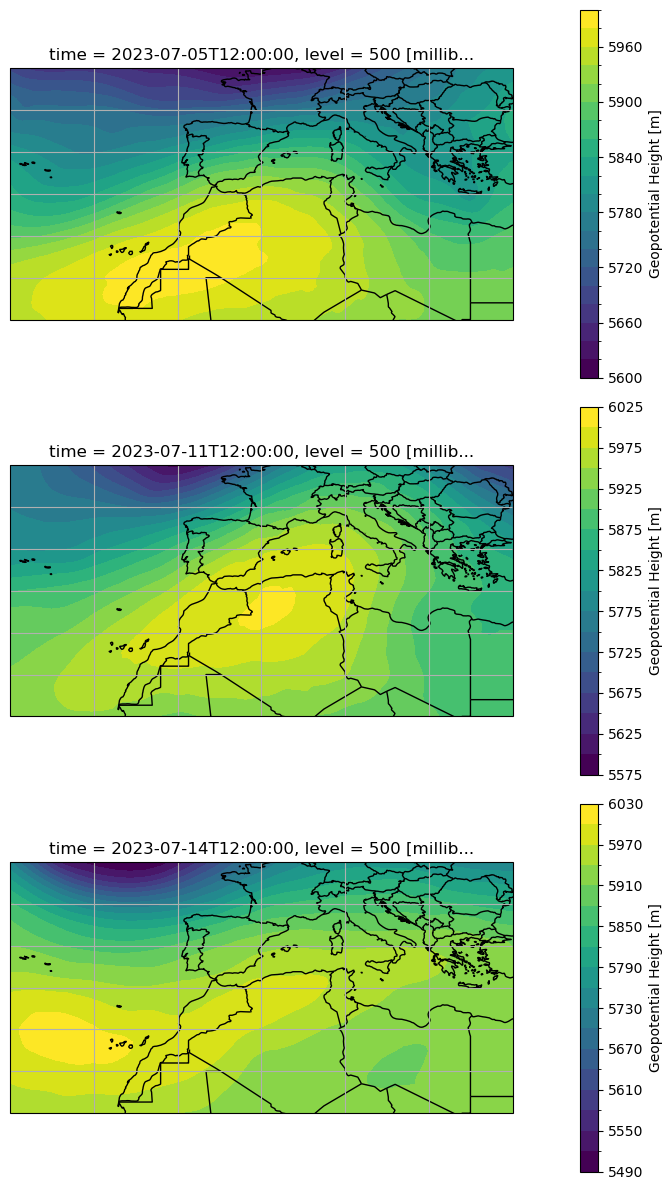

In [90]:
# Select the longitude and latitude ranges
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Select the geopotential data for the 500 hPa level and the specified longitude and latitude ranges
z_500hPa_sliced = ERA_data['z'].sel(level=500, lon=lon_range, lat=lat_range)

# Divide by the gravitational acceleration (9.81) to get the geopotential height
z_500hPa = z_500hPa_sliced / 9.81

# Create a figure and three axes arranged vertically
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7, 12), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the first geopotential height plot
ax = axes[0]
ax.set_title('')
z_500hPa.isel(time=18).plot.contourf(ax=ax, cmap='viridis', levels=20, transform=ccrs.PlateCarree(),
                                      cbar_kwargs={'label': 'Geopotential Height [m]', 'pad': 0.1})
ax.coastlines()
ax.gridlines()
ax.add_feature(cfeature.BORDERS)

# Plot the second geopotential height plot
ax = axes[1]
ax.set_title('')
z_500hPa.isel(time=42).plot.contourf(ax=ax, cmap='viridis', levels=20, transform=ccrs.PlateCarree(),
                                      cbar_kwargs={'label': 'Geopotential Height [m]', 'pad': 0.1})
ax.coastlines()
ax.gridlines()
ax.add_feature(cfeature.BORDERS)

# Plot the third geopotential height plot
ax = axes[2]
ax.set_title('')
z_500hPa.isel(time=54).plot.contourf(ax=ax, cmap='viridis', levels=20, transform=ccrs.PlateCarree(),
                                      cbar_kwargs={'label': 'Geopotential Height [m]', 'pad': 0.1})
ax.coastlines()
ax.gridlines()
ax.add_feature(cfeature.BORDERS)

# Adjust spacing between subplots
plt.tight_layout()

# Save the plot
plt.savefig('../analysis/ERA_geopot_3plots.pdf')

# Show the plot
plt.show()

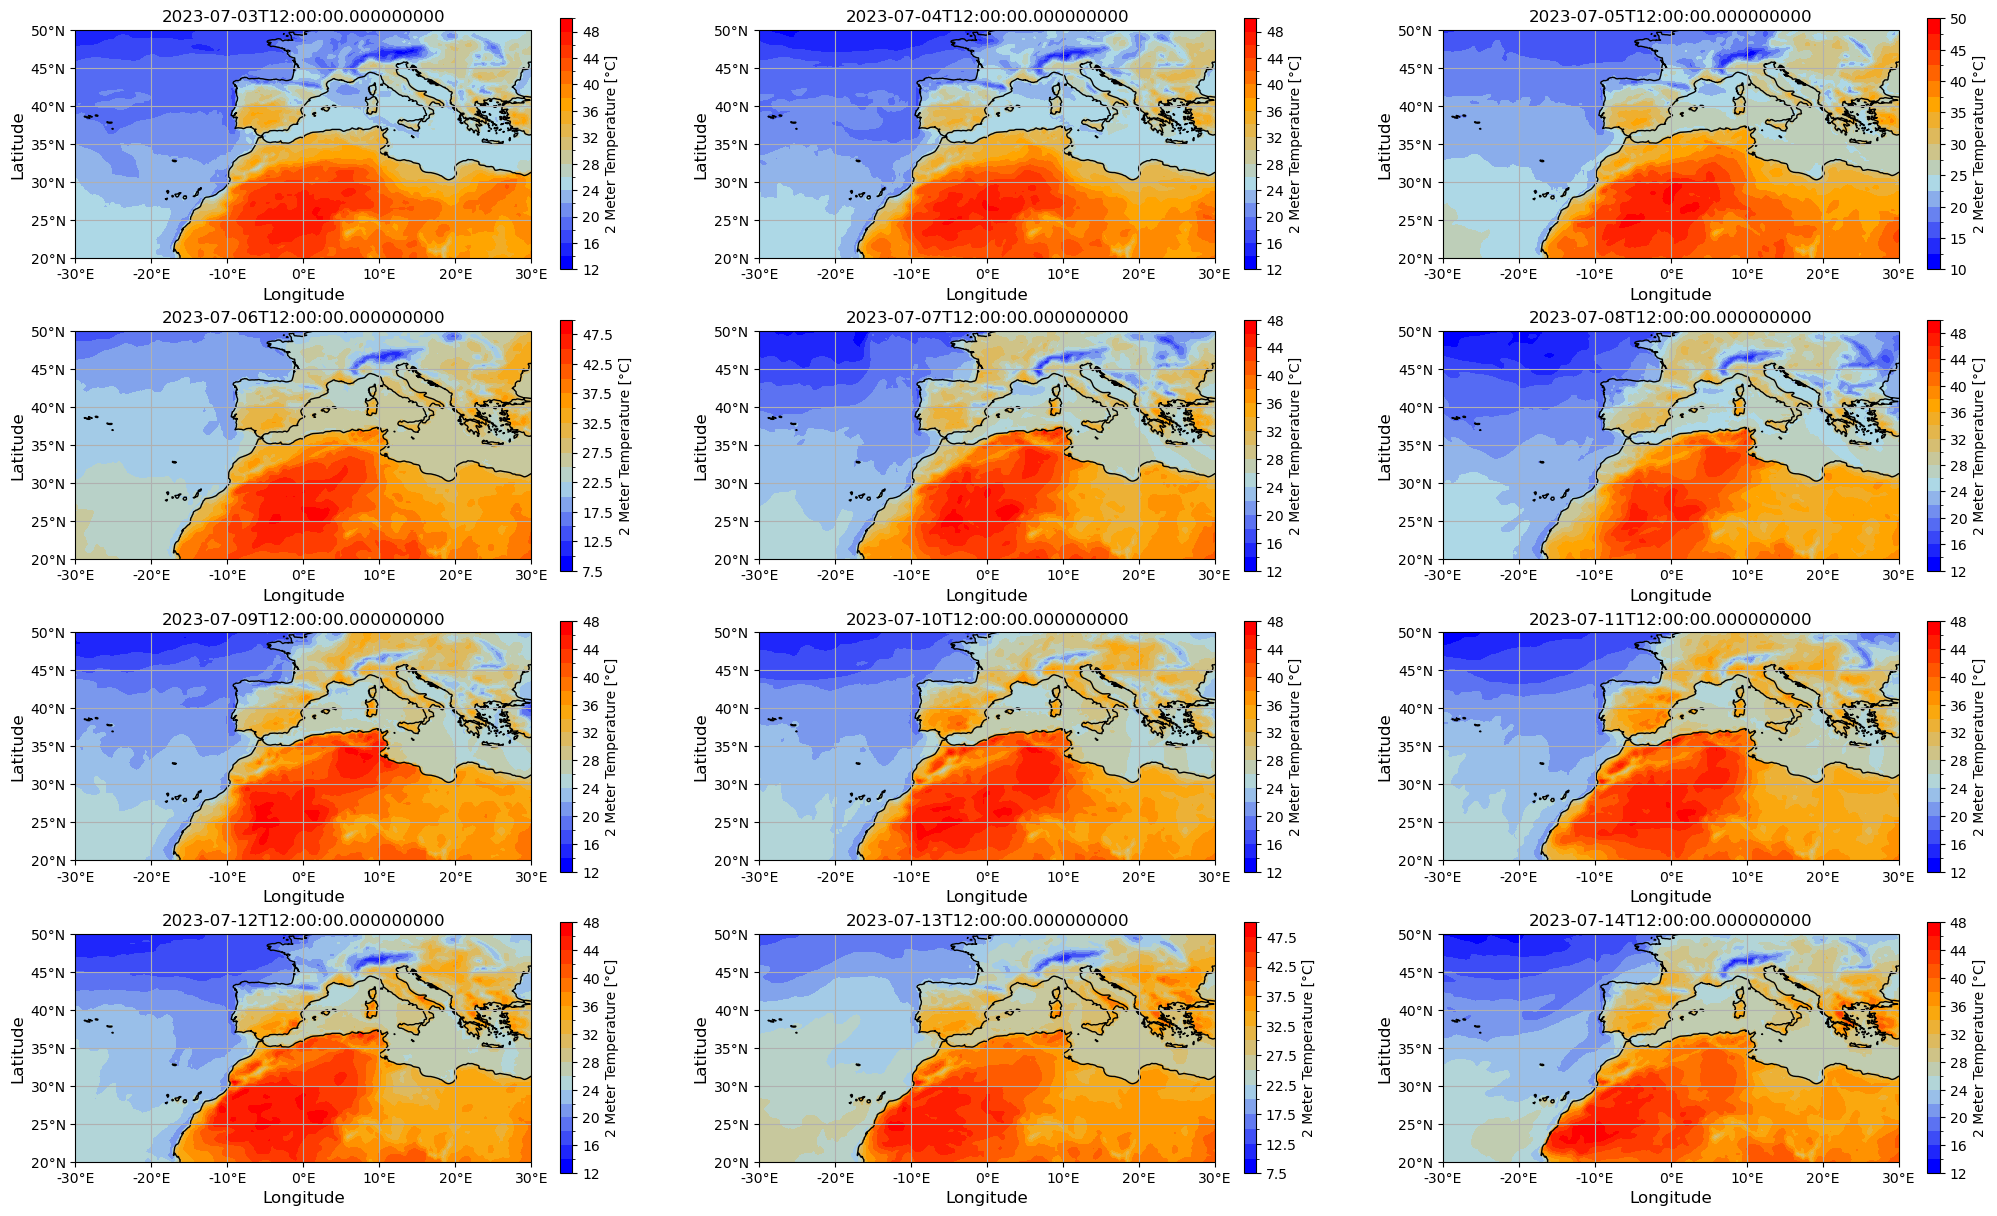

In [5]:
# Create own color ramp
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['blue', 'lightblue', 'orange', 'red'])

# Define the longitude and latitude ranges
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Select the 2-meter temperature data for the specified longitude and latitude ranges
t2m_sliced = ERA_data['t2m'].sel(lon=lon_range, lat=lat_range)-273.15

# Select specific timesteps
t2m_selected_timesteps = t2m_sliced['time'].isel(time=slice(10, 68, 4))

# Plot the 2-meter temperature for the selected timesteps
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 15), subplot_kw={'projection': ccrs.PlateCarree()})
for i, ax in enumerate(axes.flat):
    plot_data = t2m_sliced.sel(time=t2m_selected_timesteps[i])
    rounded_time = plot_data.time.dt.round('min')  # Round the time values to the nearest minute
    xplot.contourf(plot_data, ax=ax, cmap=cmap, levels=20, cbar_kwargs={'label': '2 Meter Temperature [°C]'})
    ax.coastlines()
    ax.gridlines(draw_labels=False)  # Draw gridlines only for the bottom and left axes
    ax.set_ylabel('Latitude', fontsize=12)
    ax.set_yticks(range(20, 51, 5))  # Add explicit ticks for the y-axis
    ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10)  # Add explicit labels for the y-axis
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_xticks(np.arange(-30, 31, 10))  # Add explicit ticks for the x-axis with 10 degree step
    ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  # Add explicit labels for the x-axis
    ax.set_title(rounded_time.values, fontsize=12)  # Set the title with rounded time values

# Save the plot as a PNG file
plt.savefig('../analysis/ERA_t2m.pdf')

# Show the plot
plt.show()

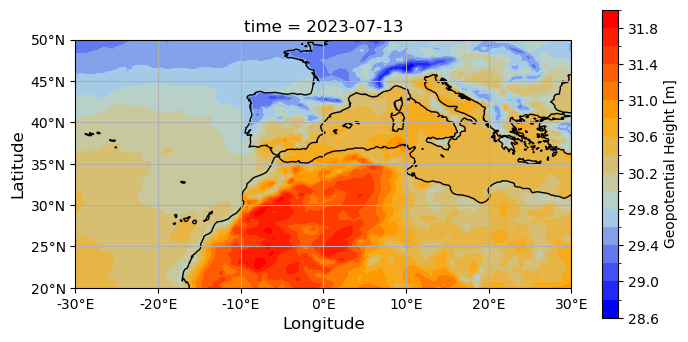

In [323]:
# Create own color ramp
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['blue', 'lightblue', 'orange', 'red'])

# Define the longitude and latitude ranges
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Select the geopotential data for the 500 hPa level and the specified longitude and latitude ranges
t2m_sliced = ERA_data['t2m'].sel(lon=lon_range, lat=lat_range) / 9.81

# Select specific timesteps
selected_timesteps = t2m_sliced['time'].isel(time=[46, 48])

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})

# Select the timestep to plot
plot_data = t2m_sliced.sel(time=selected_timesteps[1])  # Change the index to plot different timesteps

# Plot the data
xplot.contourf(plot_data, ax=ax, cmap=cmap, levels=20, cbar_kwargs={'label': 'Geopotential Height [m]'})

# Add coastlines
ax.coastlines()

# Draw gridlines only for the bottom and left axes
ax.gridlines(draw_labels=False)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
ax.set_yticks(range(20, 51, 5))  
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
ax.set_xticks(np.arange(-30, 31, 10))  
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  

# Save the plot as a PDF file
plt.savefig('../analysis/ERA_t2m_selected_timesteps_07.12.midnight.pdf')

# Show the plot
plt.show()

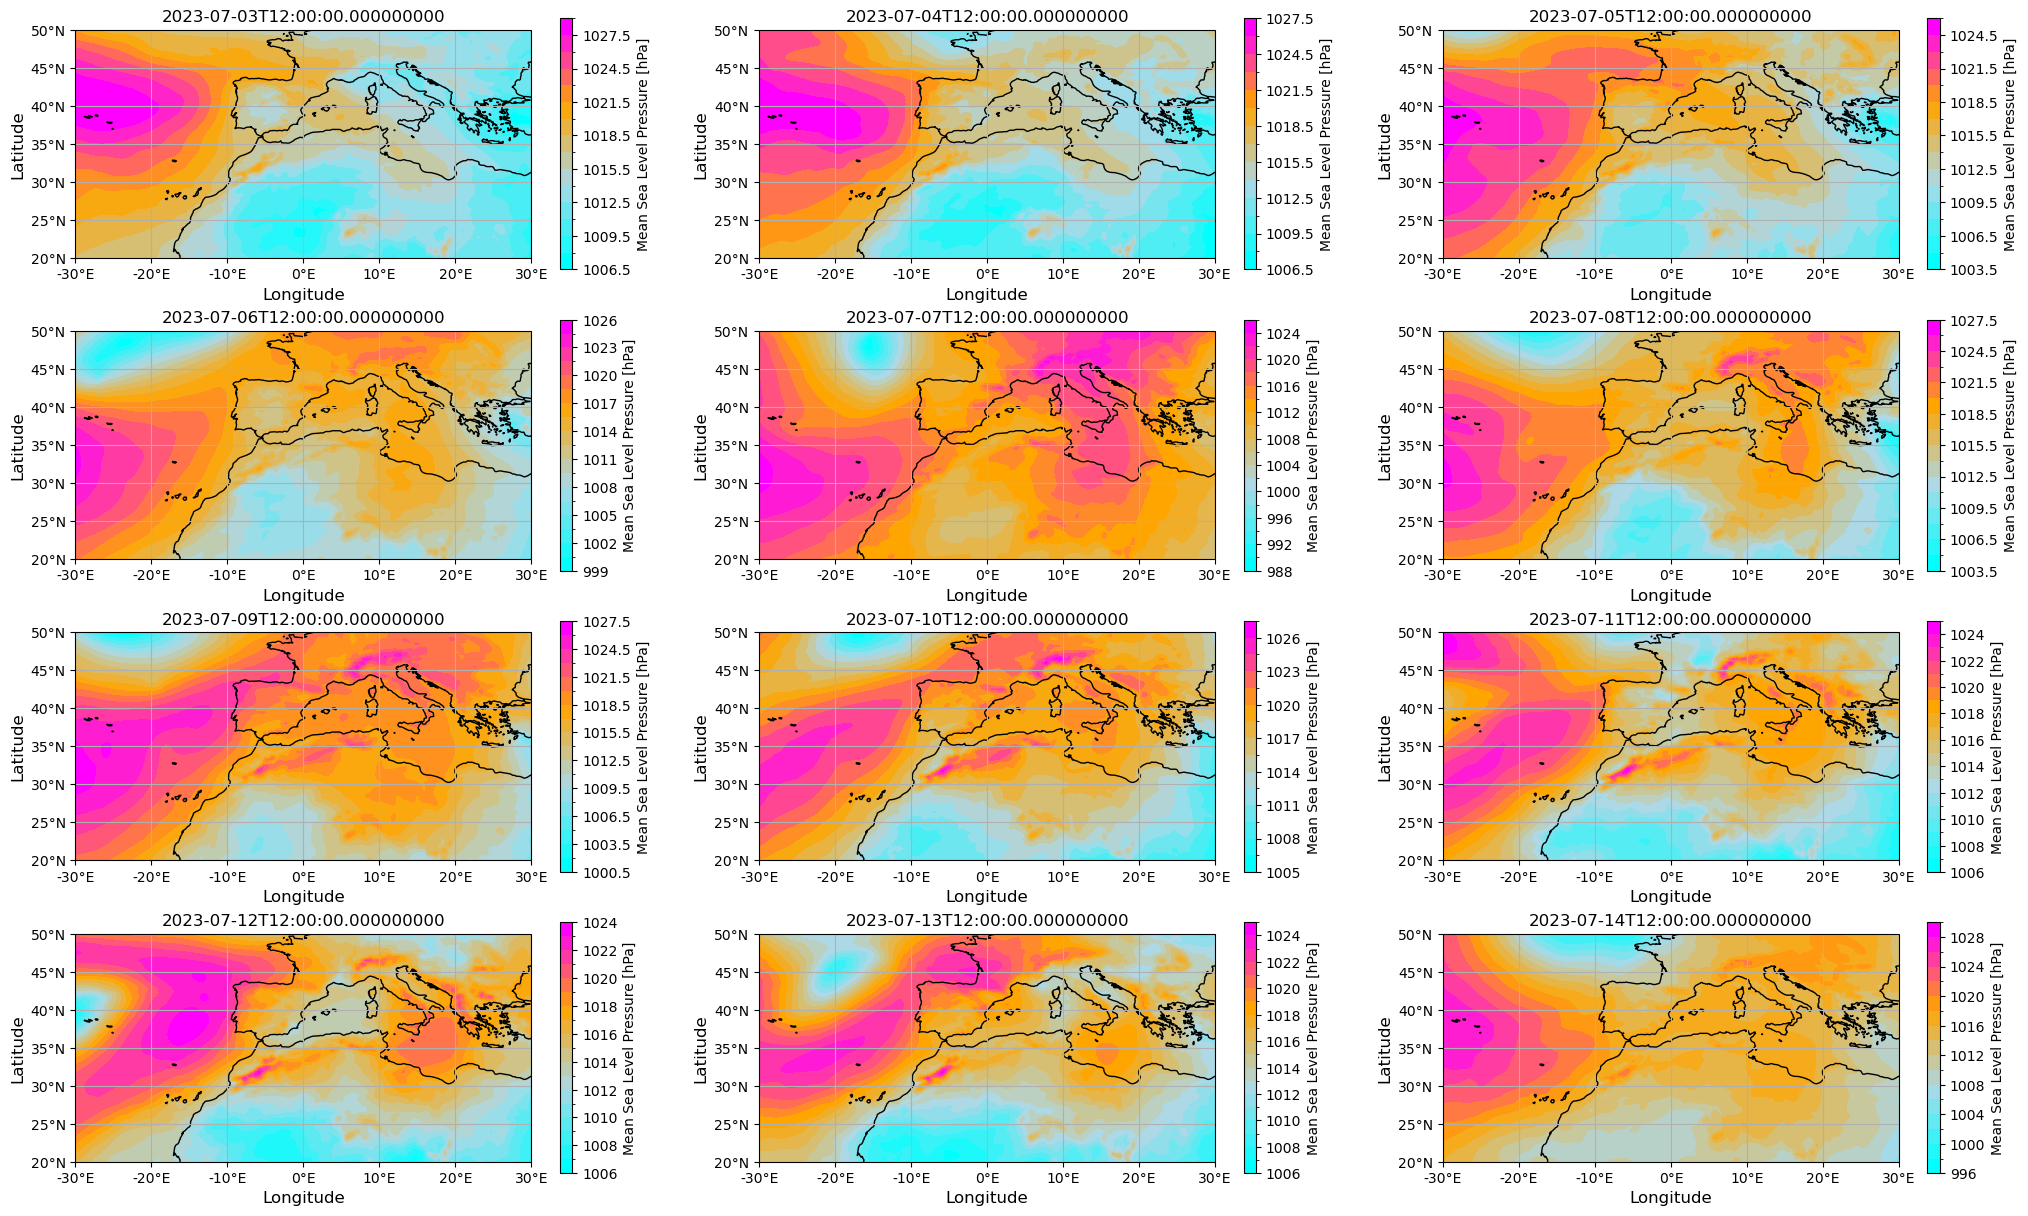

In [274]:
# Create own color ramp
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['cyan', 'lightblue', 'orange', 'magenta'])

# Define the longitude and latitude ranges
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Select the 2-meter temperature data for the specified longitude and latitude ranges
mslp_sliced = ERA_data['msl'].sel(lon=lon_range, lat=lat_range)/100

# Select specific timesteps
mslp_selected_timesteps = mslp_sliced['time'].isel(time=slice(10, 68, 4))

# Plot the 2-meter temperature for the selected timesteps
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 15), subplot_kw={'projection': ccrs.PlateCarree()})
for i, ax in enumerate(axes.flat):
    plot_data = mslp_sliced.sel(time=t2m_selected_timesteps[i])
    rounded_time = plot_data.time.dt.round('min')  # Round the time values to the nearest minute
    xplot.contourf(plot_data, ax=ax, cmap=cmap, levels=20, cbar_kwargs={'label': 'Mean Sea Level Pressure [hPa]'})
    ax.coastlines()
    ax.gridlines(draw_labels=False)  # Draw gridlines only for the bottom and left axes
    ax.set_ylabel('Latitude', fontsize=12)
    ax.set_yticks(range(20, 51, 5))  # Add explicit ticks for the y-axis
    ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10)  # Add explicit labels for the y-axis
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_xticks(np.arange(-30, 31, 10))  # Add explicit ticks for the x-axis with 10 degree step
    ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  # Add explicit labels for the x-axis
    ax.set_title(rounded_time.values, fontsize=12)  # Set the title with rounded time values

# Save the plot as a PDF file
plt.savefig('../analysis/ERA_msl.pdf')
# Show the plot
plt.show()

# Pangu-Weather

In [305]:
# Open netCDF file: Data 2.7.2023
Pangu_data_20230702 = xr.open_dataset('../data/HW_EU_20230702.nc')
# Change longitudes direct in the netCDF file (from 0-360 to -180 to 180)
Pangu_data_20230702['longitude'] = Pangu_data_20230702['longitude'] - 180

# Assuming you have nanoseconds stored in a variable called 'delta_ns'
delta_ns = Pangu_data_20230702['step']
# Define a base date (e.g., July 2, 2023)
base_date = np.datetime64('2023-07-02T12:00:00')
# Extract the values from delta_ns
step_values = delta_ns.values
# Convert nanoseconds to seconds
seconds = step_values / 1e9
# Create an empty list to store the converted dates
converted_dates = []
# Iterate over the seconds array and add each converted date to the list
for second in seconds:
    converted_dates.append(base_date + np.timedelta64(int(second), 's'))

# Convert the list to a NumPy array if needed
converted_dates_array = np.array(converted_dates)
# Print the steps
print("Converted dates:", converted_dates_array)

Converted dates: ['2023-07-12T06:00:00' '2023-07-12T12:00:00' '2023-07-12T18:00:00'
 '2023-07-13T00:00:00' '2023-07-13T06:00:00' '2023-07-13T12:00:00'
 '2023-07-13T18:00:00' '2023-07-14T00:00:00' '2023-07-14T06:00:00'
 '2023-07-14T12:00:00' '2023-07-14T18:00:00' '2023-07-15T00:00:00'
 '2023-07-15T06:00:00' '2023-07-15T12:00:00']


In [287]:
delta_ns=Pangu_data_20230702['step']
print(delta_ns)

<xarray.DataArray 'step' (step: 14)> Size: 112B
array([ 842400000000000,  864000000000000,  885600000000000,  907200000000000,
        928800000000000,  950400000000000,  972000000000000,  993600000000000,
       1015200000000000, 1036800000000000, 1058400000000000, 1080000000000000,
       1101600000000000, 1123200000000000], dtype='timedelta64[ns]')
Coordinates:
  * step               (step) timedelta64[ns] 112B 9 days 18:00:00 ... 13 day...
    valid_time         (step) datetime64[ns] 112B ...
    time               datetime64[ns] 8B ...
    meanSea            float64 8B ...
    heightAboveGround  float64 8B ...
Attributes:
    long_name:      time since forecast_reference_time
    standard_name:  forecast_period


In [284]:
# Open netCDF file: Data 7.7.2023
Pangu_data_20230707 = xr.open_dataset('../data/HW_EU_20230707.nc')
# Change longitudes direct in the netCDF file (from 0-360 to -180 to 180)
Pangu_data_20230707['longitude'] = Pangu_data_20230707['longitude'] - 180
Pangu_data_20230707

<xarray.Dataset> Size: 137MB
Dimensions:            (longitude: 1440, latitude: 121, step: 14,
                        isobaricInhPa: 2)
Coordinates:
  * longitude          (longitude) float64 12kB -180.0 -179.8 ... 179.5 179.8
  * latitude           (latitude) float64 968B 50.0 49.75 49.5 ... 20.25 20.0
  * step               (step) timedelta64[ns] 112B 4 days 18:00:00 ... 8 days...
    valid_time         (step) datetime64[ns] 112B ...
  * isobaricInhPa      (isobaricInhPa) float64 16B 850.0 500.0
    time               datetime64[ns] 8B ...
    meanSea            float64 8B ...
    heightAboveGround  float64 8B ...
Data variables:
    msl                (step, latitude, longitude) float32 10MB ...
    u10                (step, latitude, longitude) float32 10MB ...
    v10                (step, latitude, longitude) float32 10MB ...
    t2                 (step, latitude, longitude) float32 10MB ...
    z                  (step, isobaricInhPa, latitude, longitude) float32 20MB ...
    q                  (step, isobaricInhPa, latitude, longitude) float32 20MB ...
    t                  (step, isobaricInhPa, latitude, longitude) float32 20MB ...
    u                  (step, isobaricInhPa, latitude, longitude) float32 20MB ...
    v                  (step, isobaricInhPa, latitude, longitude) float32 20MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-03-12T12:05 GRIB to CDM+CF via cfgrib-0.9.1...

In [307]:
# Assuming you have nanoseconds stored in a variable called 'delta_ns'
delta_ns = Pangu_data_20230707['step']
# Define a base date (e.g., July 2, 2023)
base_date = np.datetime64('2023-07-07T12:00:00')
# Extract the values from delta_ns
step_values = delta_ns.values
# Convert nanoseconds to seconds
seconds = step_values / 1e9
# Create an empty list to store the converted dates
converted_dates = []
# Iterate over the seconds array and add each converted date to the list
for second in seconds:
    converted_dates.append(base_date + np.timedelta64(int(second), 's'))

# Convert the list to a NumPy array if needed
converted_dates_array = np.array(converted_dates)
# Print the steps
print("Converted dates:", converted_dates_array)

Converted dates: ['2023-07-12T06:00:00' '2023-07-12T12:00:00' '2023-07-12T18:00:00'
 '2023-07-13T00:00:00' '2023-07-13T06:00:00' '2023-07-13T12:00:00'
 '2023-07-13T18:00:00' '2023-07-14T00:00:00' '2023-07-14T06:00:00'
 '2023-07-14T12:00:00' '2023-07-14T18:00:00' '2023-07-15T00:00:00'
 '2023-07-15T06:00:00' '2023-07-15T12:00:00']


In [285]:
# Open netCDF file:  Data 11.7.2023
Pangu_data_20230711 = xr.open_dataset('../data/HW_EU_20230711.nc')
# Change longitudes direct in the netCDF file (from 0-360 to -180 to 180)
Pangu_data_20230711['longitude'] = Pangu_data_20230711['longitude'] - 180
Pangu_data_20230711

<xarray.Dataset> Size: 137MB
Dimensions:            (longitude: 1440, latitude: 121, step: 14,
                        isobaricInhPa: 2)
Coordinates:
  * longitude          (longitude) float64 12kB -180.0 -179.8 ... 179.5 179.8
  * latitude           (latitude) float64 968B 50.0 49.75 49.5 ... 20.25 20.0
  * step               (step) timedelta64[ns] 112B 0 days 06:00:00 ... 3 days...
    valid_time         (step) datetime64[ns] 112B ...
  * isobaricInhPa      (isobaricInhPa) float64 16B 850.0 500.0
    time               datetime64[ns] 8B ...
    meanSea            float64 8B ...
    heightAboveGround  float64 8B ...
Data variables:
    msl                (step, latitude, longitude) float32 10MB ...
    u10                (step, latitude, longitude) float32 10MB ...
    v10                (step, latitude, longitude) float32 10MB ...
    t2                 (step, latitude, longitude) float32 10MB ...
    z                  (step, isobaricInhPa, latitude, longitude) float32 20MB ...
    q                  (step, isobaricInhPa, latitude, longitude) float32 20MB ...
    t                  (step, isobaricInhPa, latitude, longitude) float32 20MB ...
    u                  (step, isobaricInhPa, latitude, longitude) float32 20MB ...
    v                  (step, isobaricInhPa, latitude, longitude) float32 20MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-03-12T12:05 GRIB to CDM+CF via cfgrib-0.9.1...

In [309]:
# Assuming you have nanoseconds stored in a variable called 'delta_ns'
delta_ns = Pangu_data_20230711['step']
# Define a base date (e.g., July 2, 2023)
base_date = np.datetime64('2023-07-11T12:00:00')
# Extract the values from delta_ns
step_values = delta_ns.values
# Convert nanoseconds to seconds
seconds = step_values / 1e9
# Create an empty list to store the converted dates
converted_dates = []
# Iterate over the seconds array and add each converted date to the list
for second in seconds:
    converted_dates.append(base_date + np.timedelta64(int(second), 's'))

# Convert the list to a NumPy array if needed
converted_dates_array = np.array(converted_dates)
# Print the steps
print("Converted dates:", converted_dates_array)

Converted dates: ['2023-07-11T18:00:00' '2023-07-12T00:00:00' '2023-07-12T06:00:00'
 '2023-07-12T12:00:00' '2023-07-12T18:00:00' '2023-07-13T00:00:00'
 '2023-07-13T06:00:00' '2023-07-13T12:00:00' '2023-07-13T18:00:00'
 '2023-07-14T00:00:00' '2023-07-14T06:00:00' '2023-07-14T12:00:00'
 '2023-07-14T18:00:00' '2023-07-15T00:00:00']


In [270]:
# Concatenate the datasets along the time dimension
combined_PANGU = xr.concat([Pangu_data_20230702, Pangu_data_20230707, Pangu_data_20230711], dim='step')

In [221]:
new_time = combined_PANGU['valid_time']
new=['2023-07-1T00:00:00.000000000', '2023-07-1T06:00:00.000000000', '2023-07-1T12:00:00.000000000','2023-07-1T18:00:00.000000000',
 '2023-07-2T00:00:00.000000000', '2023-07-2T06:00:00.000000000', '2023-07-2T12:00:00.000000000','2023-07-2T18:00:00.000000000',
 '2023-07-3T00:00:00.000000000', '2023-07-3T06:00:00.000000000', '2023-07-3T12:00:00.000000000','2023-07-3T18:00:00.000000000',
 '2023-07-4T00:00:00.000000000', '2023-07-4T06:00:00.000000000', '2023-07-4T12:00:00.000000000','2023-07-4T18:00:00.000000000',
 '2023-07-5T00:00:00.000000000', '2023-07-5T06:00:00.000000000', '2023-07-5T12:00:00.000000000','2023-07-5T18:00:00.000000000',
 '2023-07-6T00:00:00.000000000', '2023-07-6T06:00:00.000000000', '2023-07-6T12:00:00.000000000','2023-07-6T18:00:00.000000000',
 '2023-07-7T00:00:00.000000000', '2023-07-7T06:00:00.000000000', '2023-07-7T12:12:00.000000000','2023-07-7T18:00:00.000000000',
 '2023-07-8T00:00:00.000000000', '2023-07-8T06:00:00.000000000', '2023-07-8T12:12:00.000000000','2023-07-8T18:00:00.000000000',
 '2023-07-9T00:00:00.000000000', '2023-07-9T06:00:00.000000000', '2023-07-9T12:12:00.000000000','2023-07-9T18:00:00.000000000',
 '2023-07-10T00:00:00.000000000', '2023-07-10T06:00:00.000000000', '2023-07-10T12:00:00.000000000','2023-07-19T18:00:00.000000000',
 '2023-07-11T00:00:00.000000000', '2023-07-11T06:00:00.000000000', '2023-07-11T12:00:00.000000000','2023-07-11T18:00:00.000000000',
 '2023-07-12T00:00:00.000000000', '2023-07-12T06:00:00.000000000', '2023-07-12T12:00:00.000000000','2023-07-12T18:00:00.000000000',
 '2023-07-13T00:00:00.000000000', '2023-07-13T06:00:00.000000000', '2023-07-13T12:00:00.000000000','2023-07-13T18:00:00.000000000',
 '2023-07-14T00:00:00.000000000', '2023-07-14T06:00:00.000000000', '2023-07-14T12:00:00.000000000','2023-07-142T18:00:00.000000000',
 '2023-07-15T00:00:00.000000000', '2023-07-15T06:00:00.000000000', '2023-07-15T12:00:00.000000000','2023-07-15T18:00:00.000000000',
 '2023-07-16T00:00:00.000000000', '2023-07-16T06:00:00.000000000', '2023-07-16T12:00:00.000000000','2023-07-16T18:00:00.000000000',
 '2023-07-17T00:00:00.000000000', '2023-07-17T06:00:00.000000000', '2023-07-17T12:00:00.000000000','2023-07-17T18:00:00.000000000']
combined_PANGU['time']=new

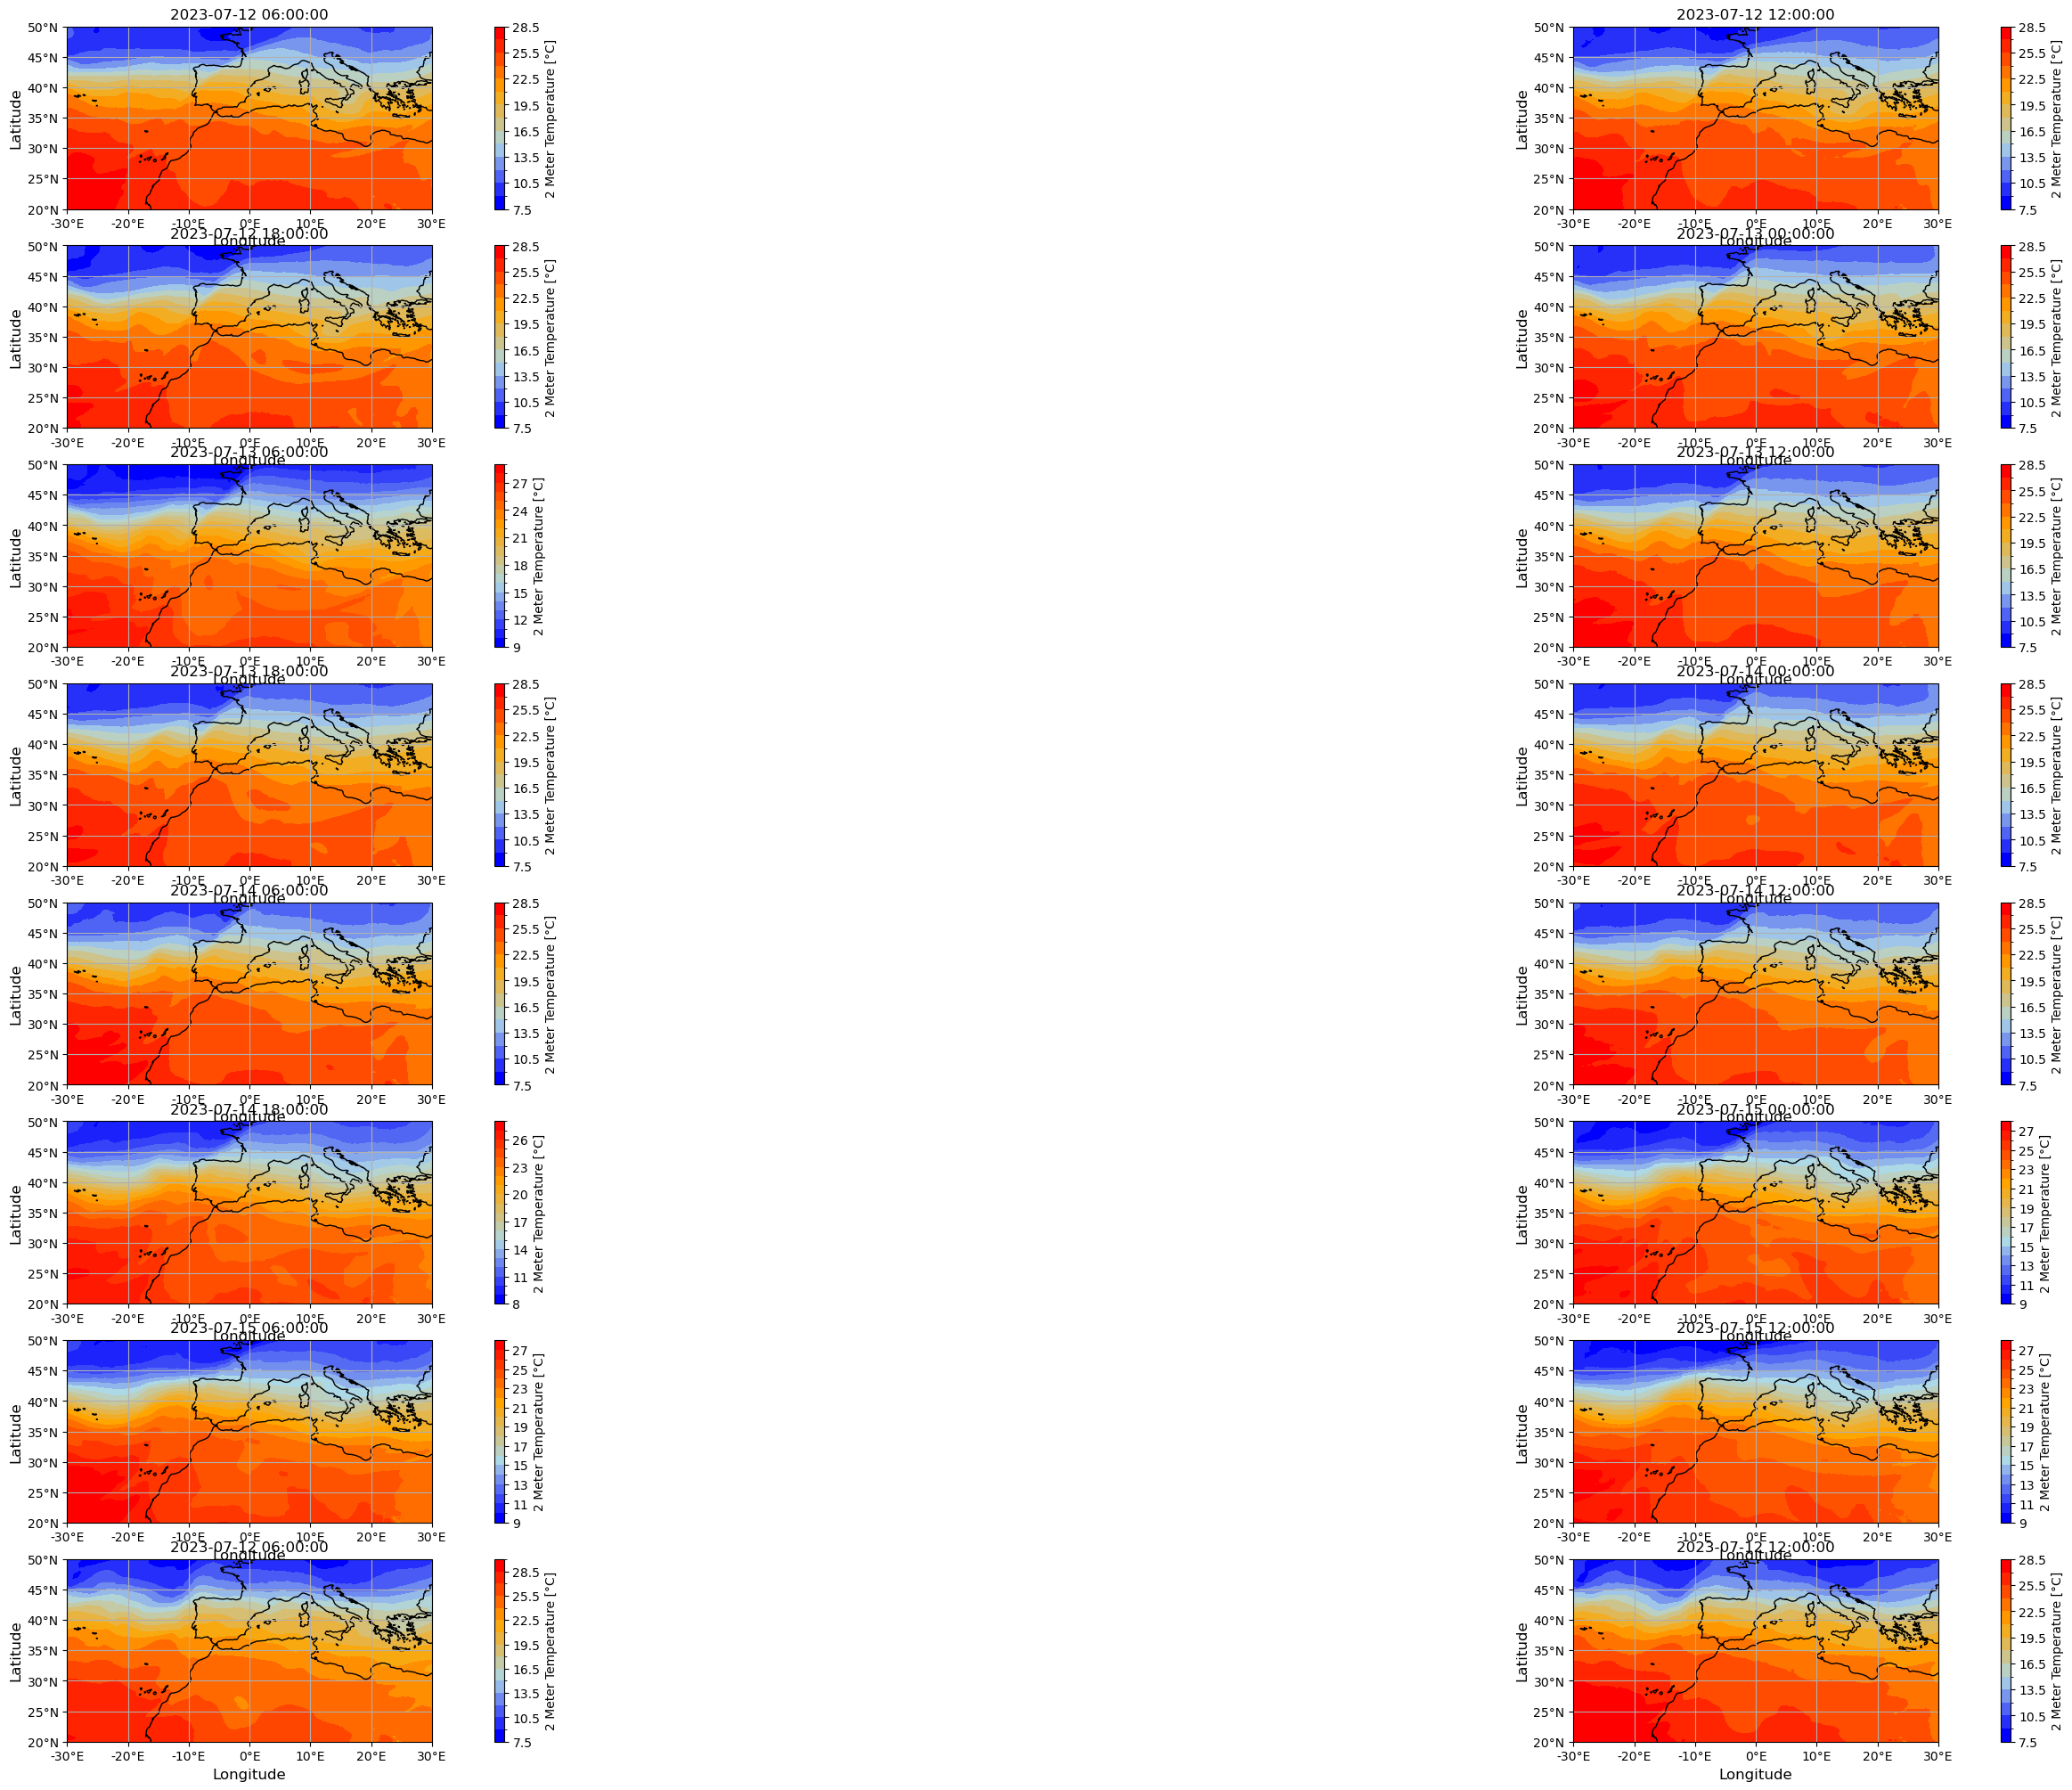

In [271]:
# Create own color ramp
t2_sliced = combined_PANGU['t2'].sel(longitude=slice(-30, 30))-273.15
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['blue', 'lightblue', 'orange', 'red'])

# Select specific timesteps
t2_selected_timesteps = t2_sliced['step'].isel(step=slice(0,16))
#[1, 5, 9, 13]
# Plot the 2-meter temperature for the selected timesteps
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(40, 25), subplot_kw={'projection': ccrs.PlateCarree()})
for i, ax in enumerate(axes.flat):
    plot_data = t2_sliced.sel(step=t2_selected_timesteps[i])
    valid_time = plot_data.valid_time.values
    rounded_time = pd.to_datetime(valid_time).round('min')  # Round the time values to the nearest minute
    xplot.contourf(plot_data, ax=ax, cmap=cmap, levels=20, cbar_kwargs={'label': '2 Meter Temperature [°C]'})
    ax.coastlines()
    ax.gridlines(draw_labels=False)  # Draw gridlines only for the bottom and left axes
    ax.set_ylabel('Latitude', fontsize=12)
    ax.set_yticks(range(20, 51, 5))  # Add explicit ticks for the y-axis
    ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10)  # Add explicit labels for the y-axis
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_xticks(np.arange(-30, 31, 10))  # Add explicit ticks for the x-axis with 10 degree step
    ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  # Add explicit labels for the x-axis
    ax.set_title(rounded_time, fontsize=12)  # Set the title with rounded time values
    
# Save the plot as a PDF file
plt.savefig('../analysis/Pangu_t2m_2023.07.03_to_2023_07_6.pdf')

# Show the plot
plt.show()

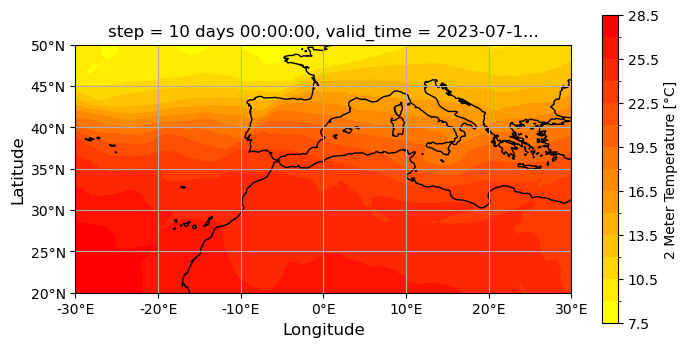

In [326]:
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['yellow', 'red'])

# Select the geopotential data for the 500 hPa level and the specified longitude and latitude ranges
t2_sliced=Pangu_data_20230702['t2'].sel(longitude=lon_range)-273.15

# Select specific timesteps [0 to 41]
selected_timesteps = t2_sliced['step'].isel(step=[1])

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})

# Select the timestep to plot, Change the index to plot different timesteps
plot_data = t2_sliced.sel(step=selected_timesteps[0]) 

# Plot the data
xplot.contourf(plot_data, ax=ax, cmap=cmap, levels=20, cbar_kwargs={'label': '2 Meter Temperature [°C]'})

# Add coastlines
ax.coastlines()

# Draw gridlines only for the bottom and left axes
ax.gridlines(draw_labels=False)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
ax.set_yticks(range(20, 51, 5))  
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
ax.set_xticks(np.arange(-30, 31, 10))  
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  

# Save the plot as a PDF file
#plt.savefig('../analysis/PANGU_geopot_selected_timesteps_07.11.pdf')

# Show the plot
plt.show()

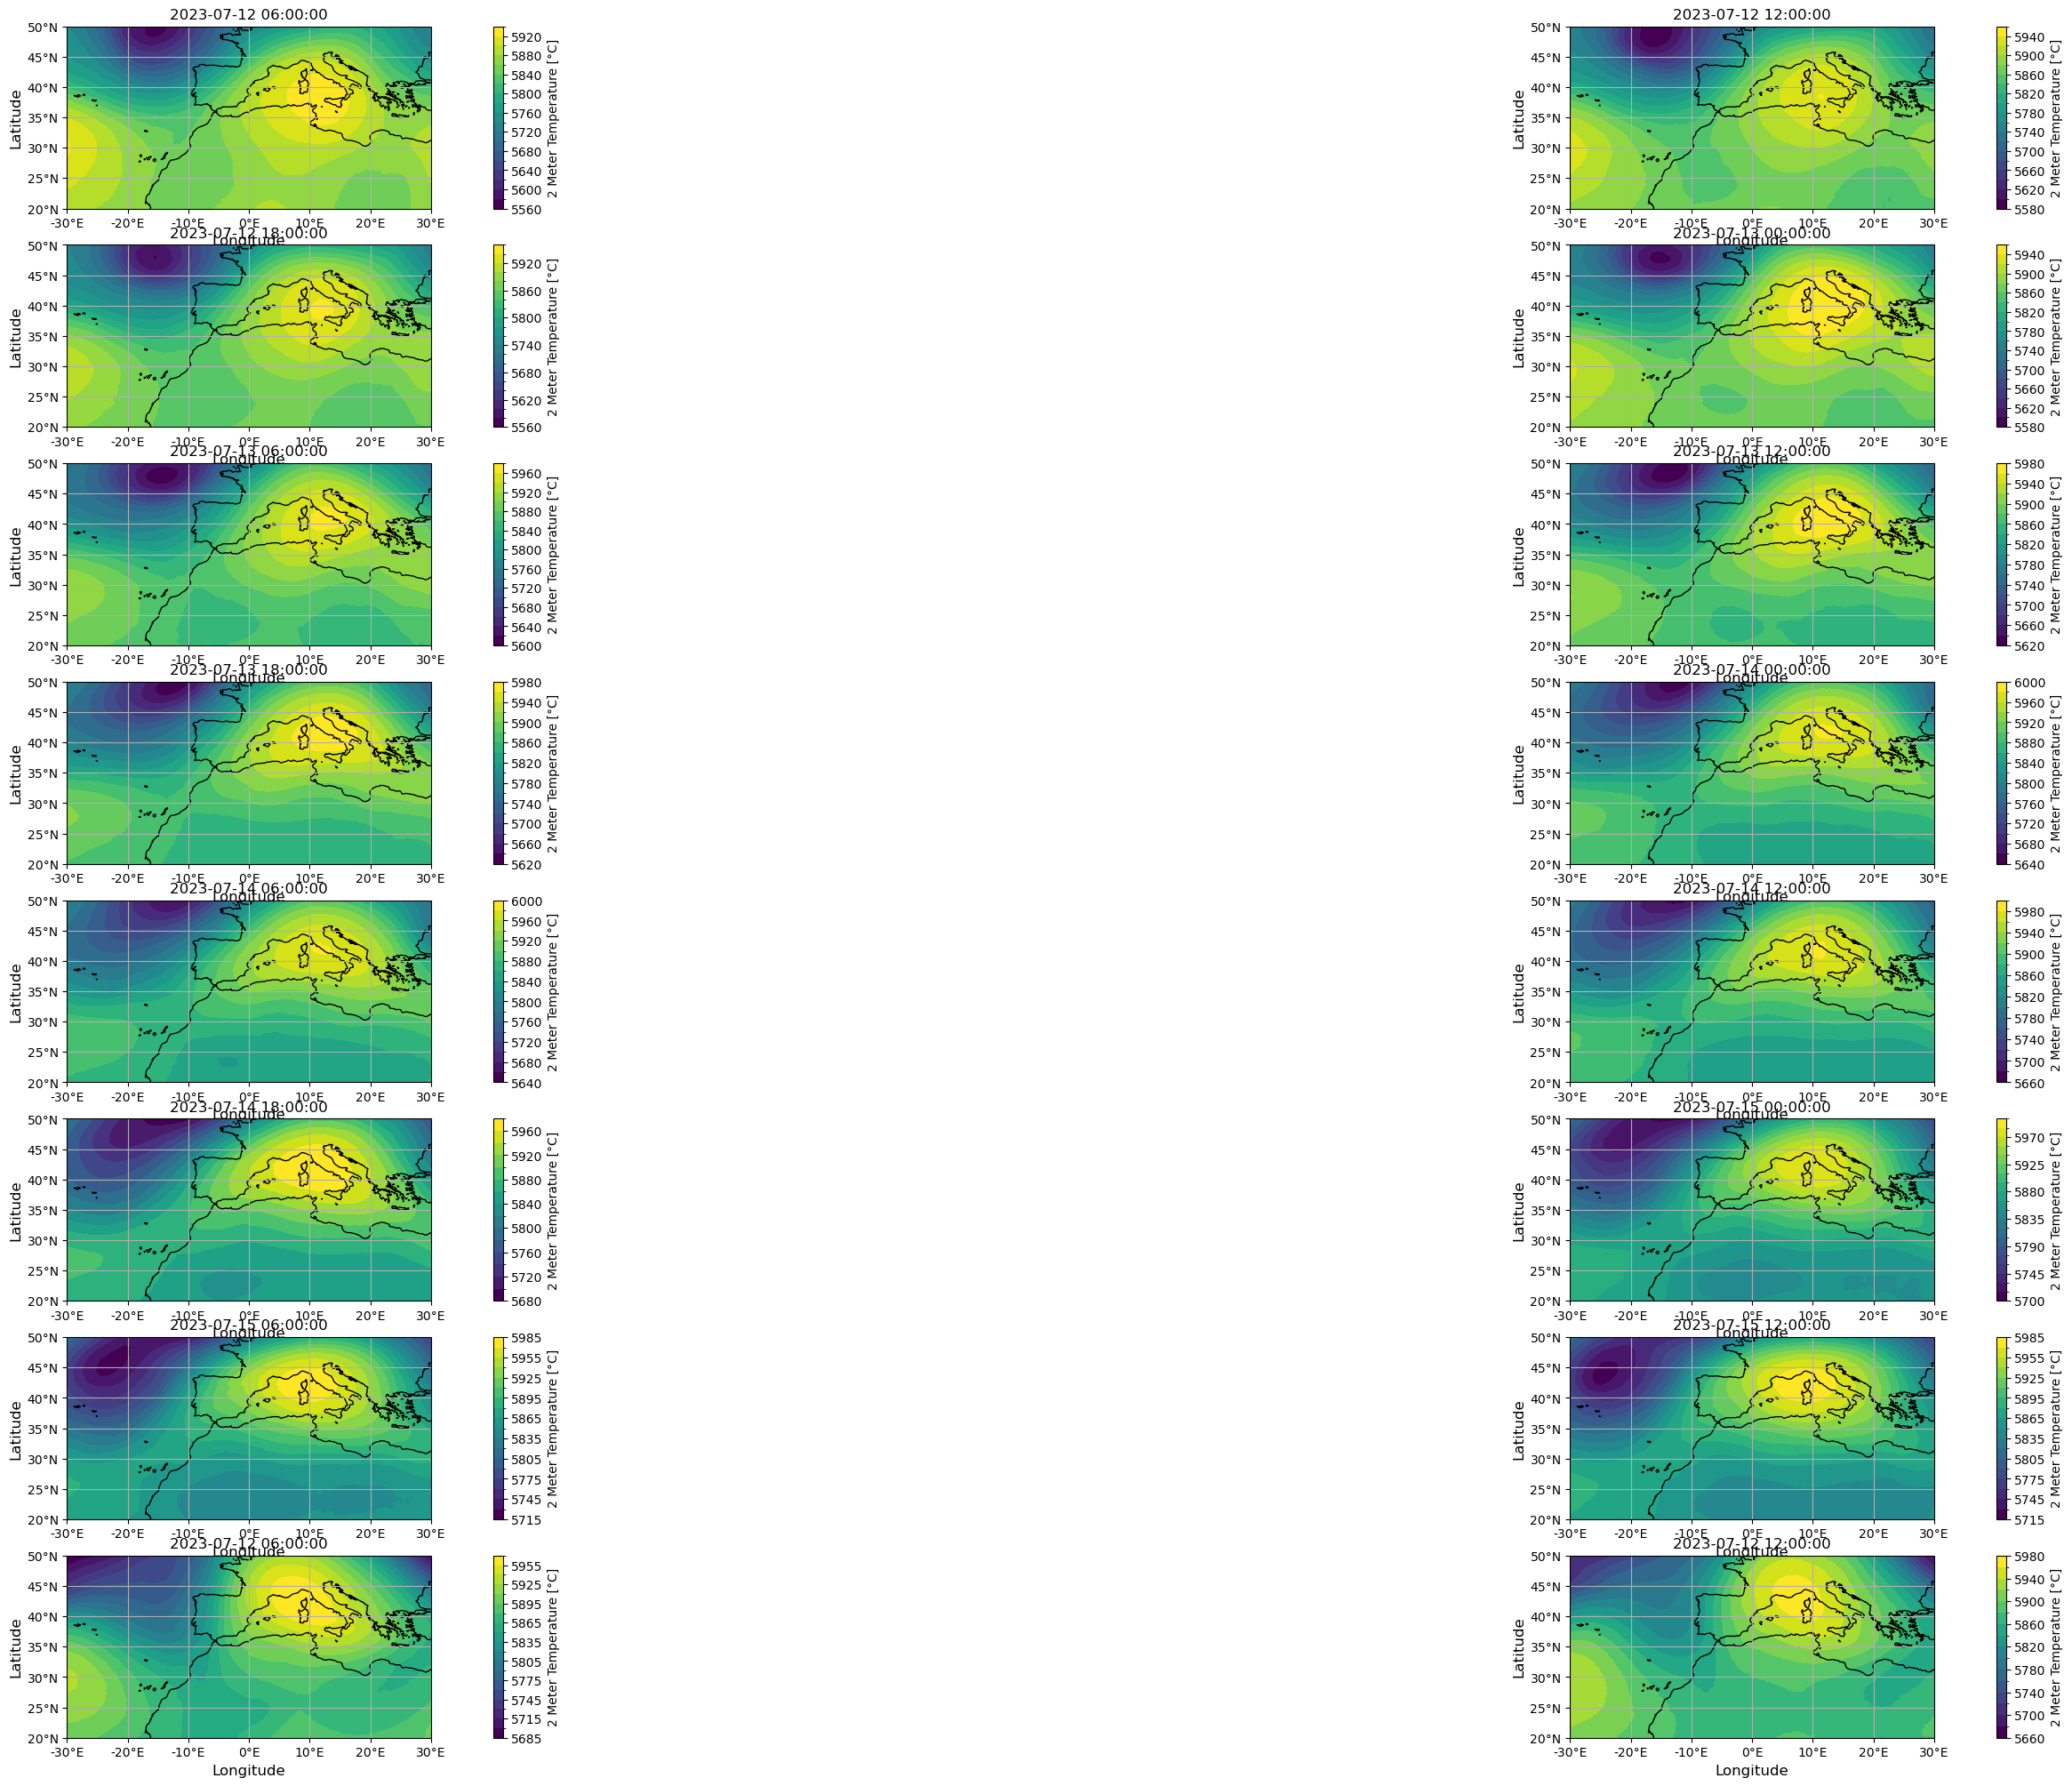

In [272]:
# Select the geopotential data for the 500 hPa level and the specified longitude and latitude ranges
z_sliced = combined_PANGU['z'].sel(isobaricInhPa=500,longitude=lon_range) / 9.81

# Select specific timesteps
z_selected_timesteps = z_sliced['step'].isel(step=slice(0,16))
#[1, 5, 9, 13]
# Plot the 2-meter temperature for the selected timesteps
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(40, 25), subplot_kw={'projection': ccrs.PlateCarree()})
for i, ax in enumerate(axes.flat):
    plot_data = z_sliced.sel(step=z_selected_timesteps[i])
    valid_time = plot_data.valid_time.values
    rounded_time = pd.to_datetime(valid_time).round('min')  # Round the time values to the nearest minute
    xplot.contourf(plot_data, ax=ax, cmap='viridis', levels=20, cbar_kwargs={'label': '2 Meter Temperature [°C]'})
    ax.coastlines()
    ax.gridlines(draw_labels=False)  # Draw gridlines only for the bottom and left axes
    ax.set_ylabel('Latitude', fontsize=12)
    ax.set_yticks(range(20, 51, 5))  # Add explicit ticks for the y-axis
    ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10)  # Add explicit labels for the y-axis
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_xticks(np.arange(-30, 31, 10))  # Add explicit ticks for the x-axis with 10 degree step
    ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  # Add explicit labels for the x-axis
    ax.set_title(rounded_time, fontsize=12)  # Set the title with rounded time values
    
# Save the plot as a PDF file
#plt.savefig('../analysis/Pangu_t2m_2023.07.03_to_2023_07_6.pdf')

# Show the plot
plt.show()

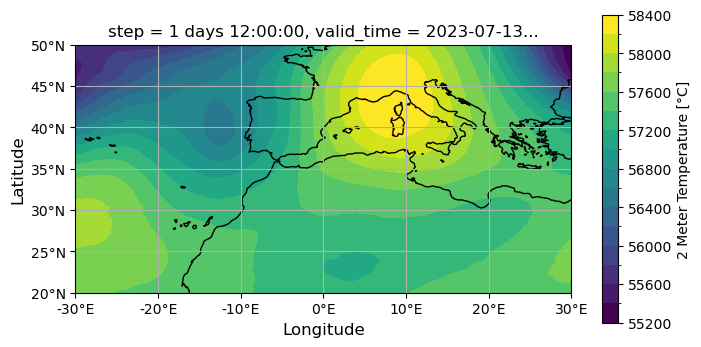

In [339]:
# Select the geopotential data for the 500 hPa level and the specified longitude and latitude ranges
z_sliced = Pangu_data_20230711['z'].sel(isobaricInhPa=500,longitude=lon_range)-273.15

# Select specific timesteps [0 to 41]
selected_timesteps = z_sliced['step'].isel(step=[5])

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})

# Select the timestep to plot, Change the index to plot different timesteps
plot_data = z_sliced.sel(step=selected_timesteps[0]) 

# Plot the data
xplot.contourf(plot_data, ax=ax, cmap='viridis', levels=20, cbar_kwargs={'label': '2 Meter Temperature [°C]'})

# Add coastlines
ax.coastlines()

# Draw gridlines only for the bottom and left axes
ax.gridlines(draw_labels=False)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
ax.set_yticks(range(20, 51, 5))  
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
ax.set_xticks(np.arange(-30, 31, 10))  
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  

# Save the plot as a PDF file
plt.savefig('../analysis/PANGU_geopot_0days_07.13.midnight.pdf')

# Show the plot
plt.show()

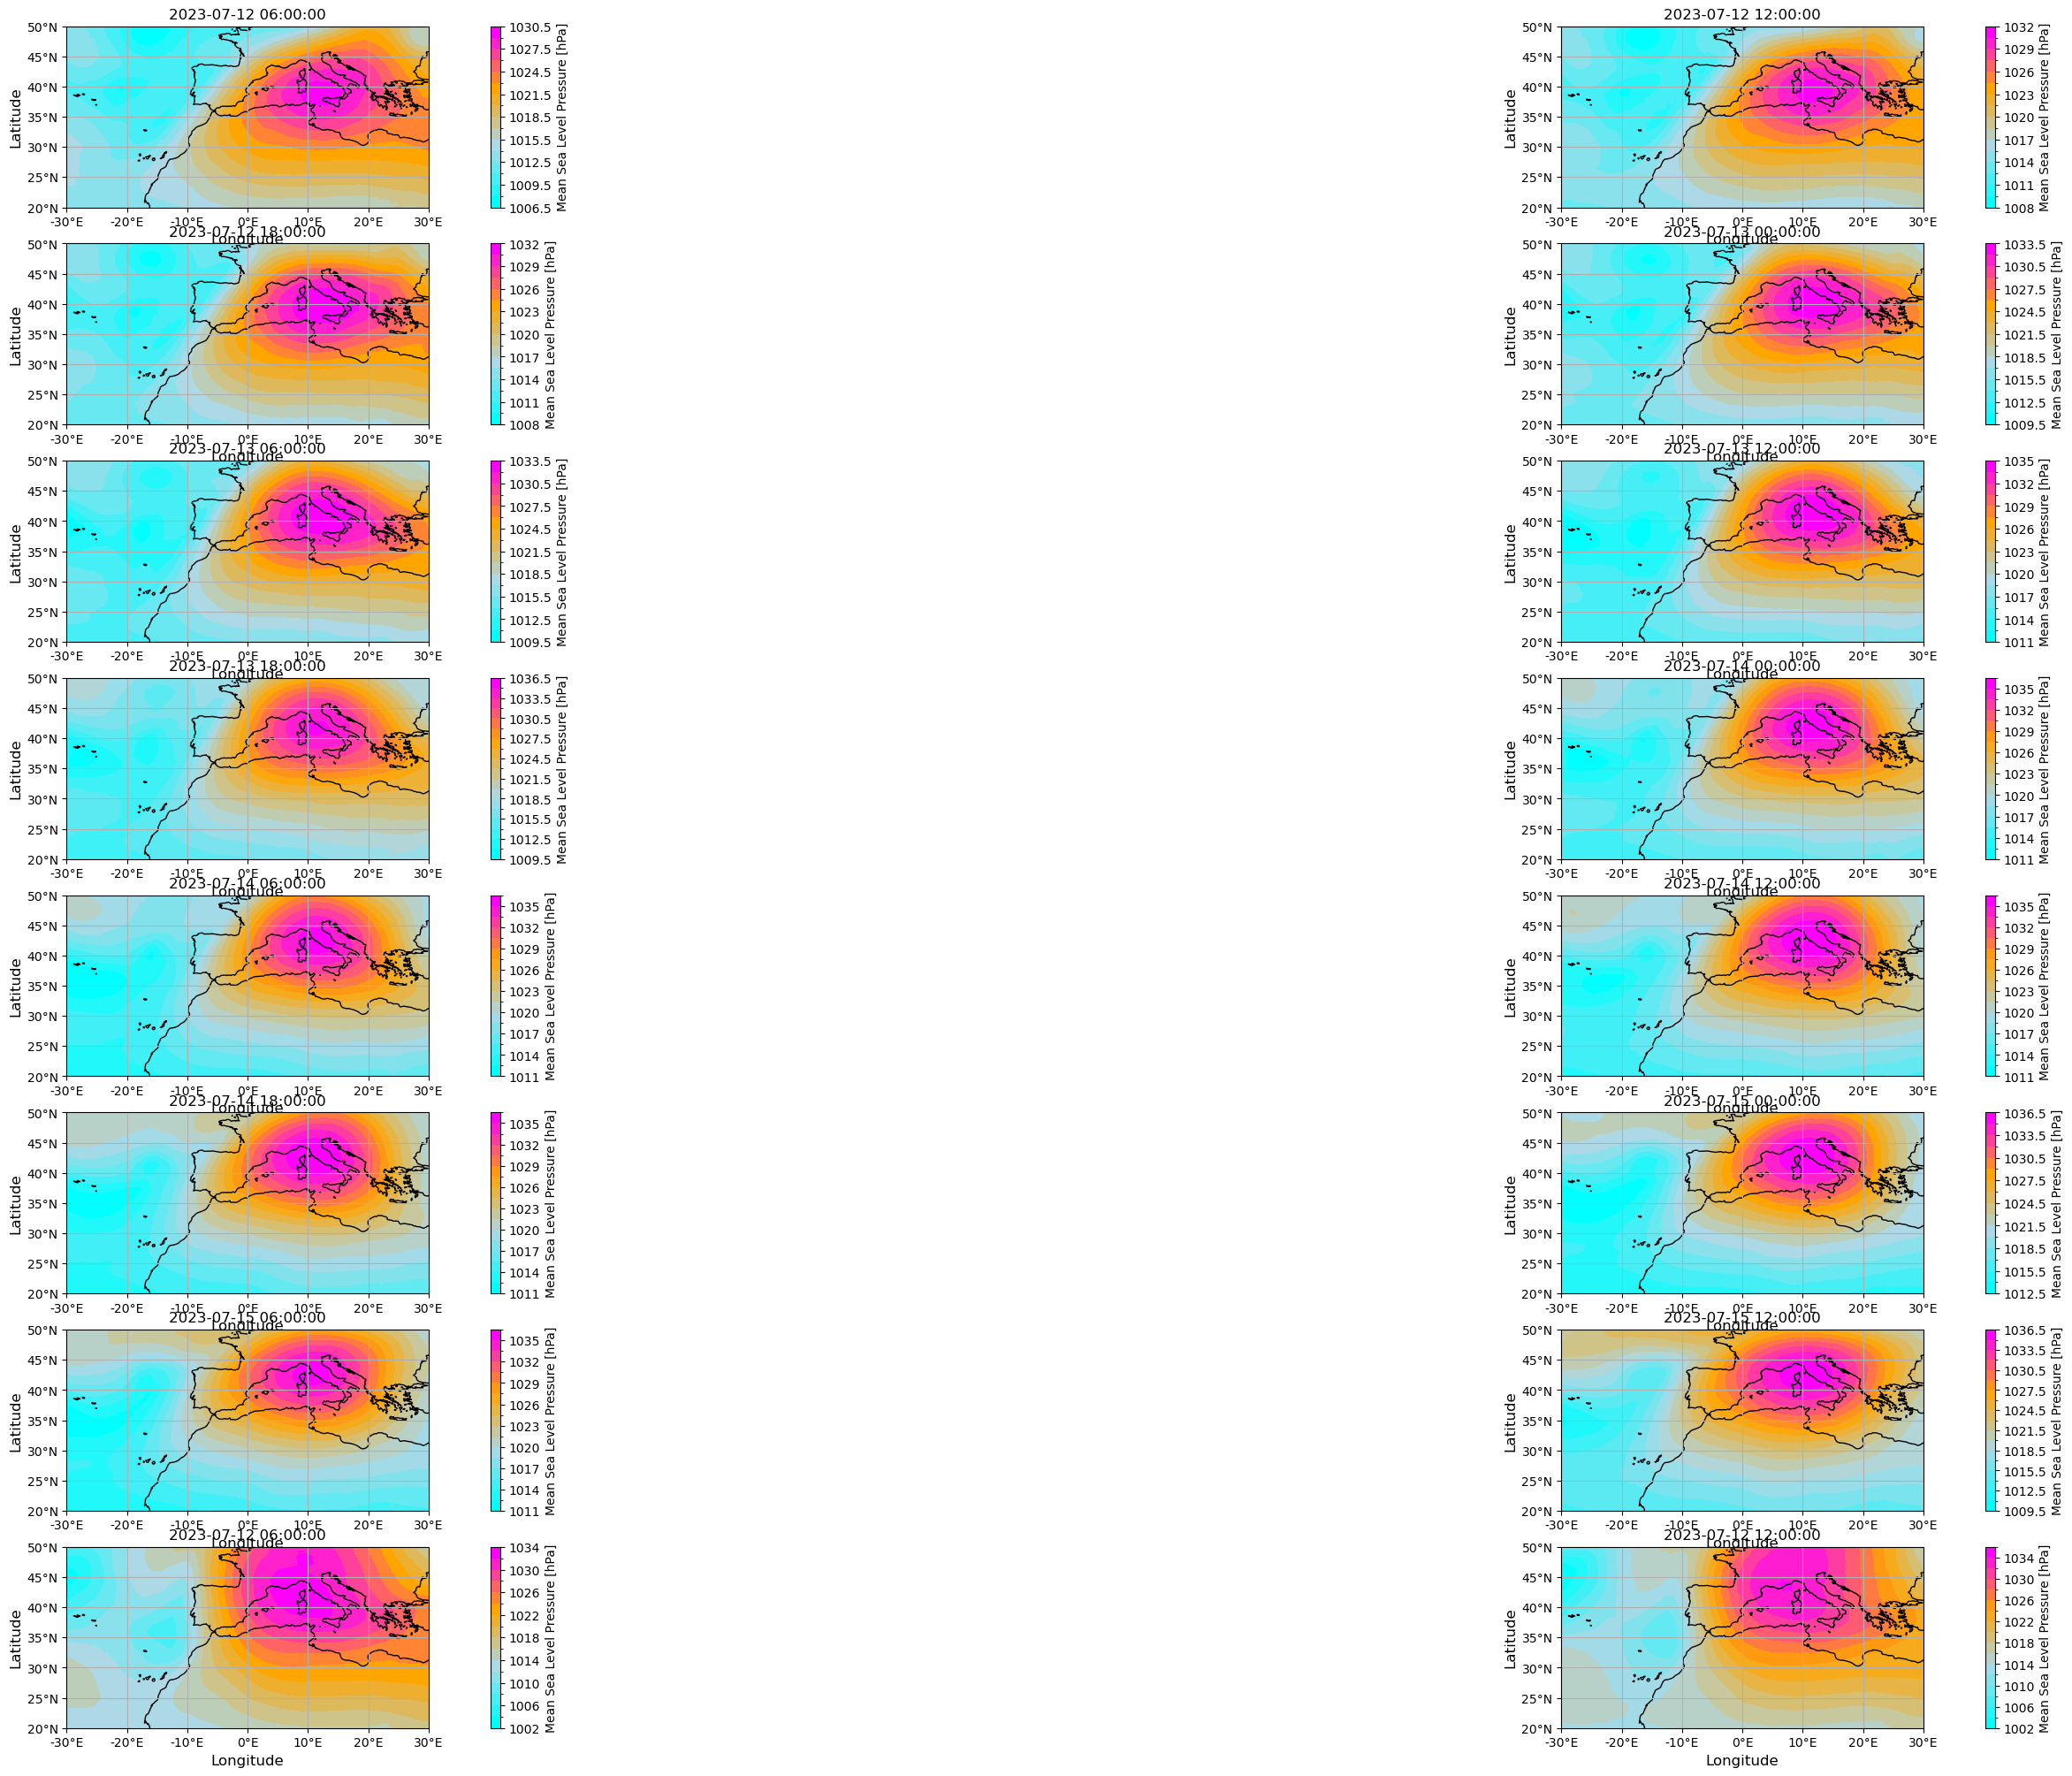

In [277]:
# Create own color ramp
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['cyan', 'lightblue', 'orange', 'magenta'])
msl_sliced = combined_PANGU['msl'].sel(longitude=slice(-30, 30)) / 100

# Select specific timesteps
msl_selected_timesteps = msl_sliced['step'].isel(step=slice(0,16))
#[1, 5, 9, 13]
# Plot the 2-meter temperature for the selected timesteps
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(40, 25), subplot_kw={'projection': ccrs.PlateCarree()})
for i, ax in enumerate(axes.flat):
    plot_data = msl_sliced.sel(step=msl_selected_timesteps[i])
    valid_time = plot_data.valid_time.values
    rounded_time = pd.to_datetime(valid_time).round('min')  # Round the time values to the nearest minute
    xplot.contourf(plot_data, ax=ax, cmap=cmap, levels=20, cbar_kwargs={'label': 'Mean Sea Level Pressure [hPa]'})
    ax.coastlines()
    ax.gridlines(draw_labels=False)  # Draw gridlines only for the bottom and left axes
    ax.set_ylabel('Latitude', fontsize=12)
    ax.set_yticks(range(20, 51, 5))  # Add explicit ticks for the y-axis
    ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10)  # Add explicit labels for the y-axis
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_xticks(np.arange(-30, 31, 10))  # Add explicit ticks for the x-axis with 10 degree step
    ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  # Add explicit labels for the x-axis
    ax.set_title(rounded_time, fontsize=12)  # Set the title with rounded time values
    
# Save the plot as a PDF file
#plt.savefig('../analysis/Pangu_t2m_2023.07.03_to_2023_07_6.pdf')

# Show the plot
plt.show()

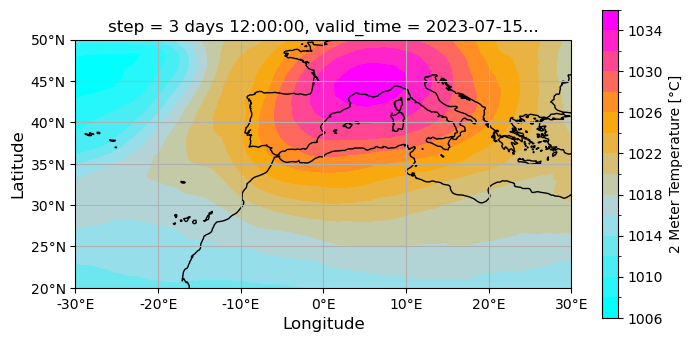

In [279]:
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['cyan', 'lightblue', 'orange', 'magenta'])

# Select the geopotential data for the 500 hPa level and the specified longitude and latitude ranges
msl_sliced = combined_PANGU['msl'].sel(longitude=lon_range) / 100

# Select specific timesteps [0 to 41]
selected_timesteps = msl_sliced['step'].isel(step=[41])

# Plot the 2-meter temperature for the selected timesteps
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})

# Select the timestep to plot, Change the index to plot different timesteps
plot_data = msl_sliced.sel(step=selected_timesteps[0]) 

# Plot the data
xplot.contourf(plot_data, ax=ax, cmap=cmap, levels=20, cbar_kwargs={'label': '2 Meter Temperature [°C]'})

# Add coastlines
ax.coastlines()

# Draw gridlines only for the bottom and left axes
ax.gridlines(draw_labels=False)  

# Add labels and ticks
ax.set_ylabel('Latitude', fontsize=12)
ax.set_yticks(range(20, 51, 5))  
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10) 
ax.set_xlabel('Longitude', fontsize=12)
ax.set_xticks(np.arange(-30, 31, 10))  
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  

# Save the plot as a PDF file
#plt.savefig('../analysis/PANGU_geopot_selected_timesteps_07.11.pdf')

# Show the plot
plt.show()

## Scatterplots

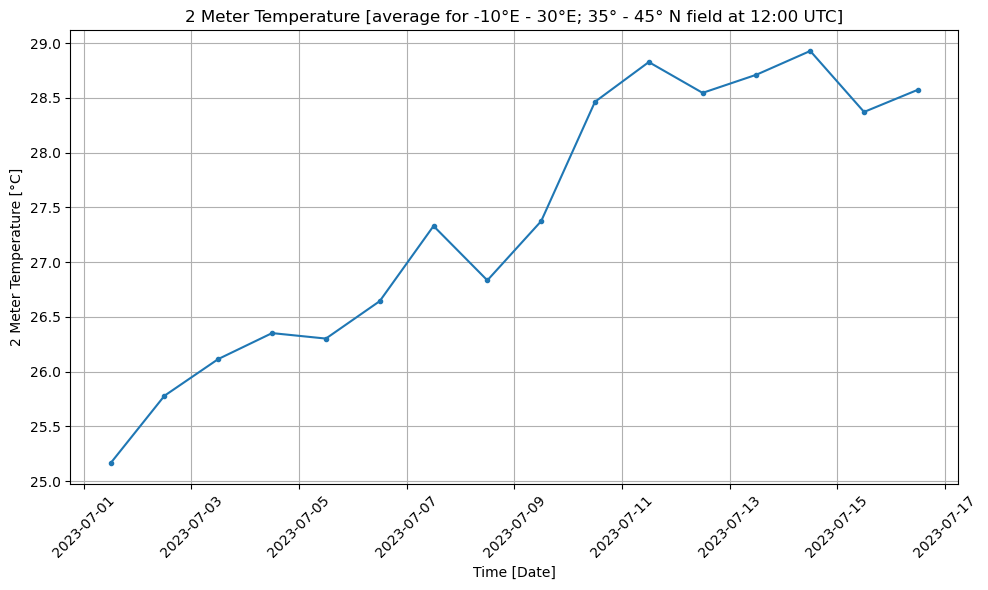

In [28]:
# Select the desired area (e.g., longitude -30 to 30, latitude 20 to 50)
lon_range = slice(-10, 30)
lat_range = slice(35, 45)

# Select the 2-meter temperature data for the specified longitude and latitude ranges
t2m_sliced = ERA_data['t2m'].sel(lon=lon_range, lat=lat_range)-273.15

# Select specific timesteps
selected_timesteps = t2m_sliced['time'].isel(time=slice(2, 64, 4))

# Filter the data to include only the selected timesteps
t2m_selected = t2m_sliced.sel(time=selected_timesteps)

# Calculate the mean temperature for each time step
mean_temperature = t2m_selected.mean(dim=('lon', 'lat'))

# Convert time to a pandas datetime index for plotting
mean_temperature = mean_temperature.to_pandas()

# Plot scatterplot with tiny lines
plt.figure(figsize=(10, 6))
plt.plot(mean_temperature.index, mean_temperature.values, marker='o', linestyle='-', markersize=3)
plt.xlabel('Time [Date]')
plt.ylabel('2 Meter Temperature [°C]')
plt.title('2 Meter Temperature [average for -10°E - 30°E; 35° - 45° N field at 12:00 UTC]')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.tight_layout()
plt.show()

In [156]:
# The latitude of Rome, Italy is 41.902782, and the longitude is 12.496366
# Select the desired area (e.g., longitude -30 to 30, latitude 20 to 50)
lon_range = slice(-10, 30)
lat_range = slice(35, 45)

# Select the 2-meter temperature data for the specified longitude and latitude ranges
t2m_sliced = ERA_data['t2m'].sel(lon=-3.703790, lat=40.416775)-273.15

# Select specific timesteps
selected_timesteps = t2m_sliced['time'].isel(time=slice(2, 64, 4))

# Filter the data to include only the selected timesteps
t2m_selected = t2m_sliced.sel(time=selected_timesteps)

# Calculate the mean temperature for each time step
mean_temperature = t2m_selected.mean(dim=('lon', 'lat'))

# Convert time to a pandas datetime index for plotting
mean_temperature = mean_temperature.to_pandas()

# Plot scatterplot with tiny lines
plt.figure(figsize=(10, 6))
plt.plot(mean_temperature.index, mean_temperature.values, marker='o', linestyle='-', markersize=3)
plt.xlabel('Time [Date]')
plt.ylabel('2 Meter Temperature [°C]')
plt.title('2 Meter Temperature [average for -10°E - 30°E; 35° - 45° N field at 12:00 UTC]')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.tight_layout()
plt.show()
# Latitude and longitude coordinates are: 40.416775, -3.703790. Madrid
# Latitude and longitude coordinates are: 37.983810, 23.727539. Athena
# Latitude and longitude coordinates are: 45.815399, 15.966568. Zagreb
# The latitude of Ljubljana, Slovenia is 46.056946, and the longitude is 14.505751.
# The latitude of Belgrade, Serbia is 44.787197, and the longitude is 20.457273. Belgrade, 

KeyError: "not all values found in index 'lon'. Try setting the `method` keyword argument (example: method='nearest')."

In [50]:
# 
Pangu_for_scatter = Pangu_data_20230702

# Reverse the latitude array
lat_reverse = Pangu_for_scatter['latitude'][::-1]

# Assign the reversed latitude array to the latitude coordinate
Pangu_for_scatter['latitude'] = lat_reverse


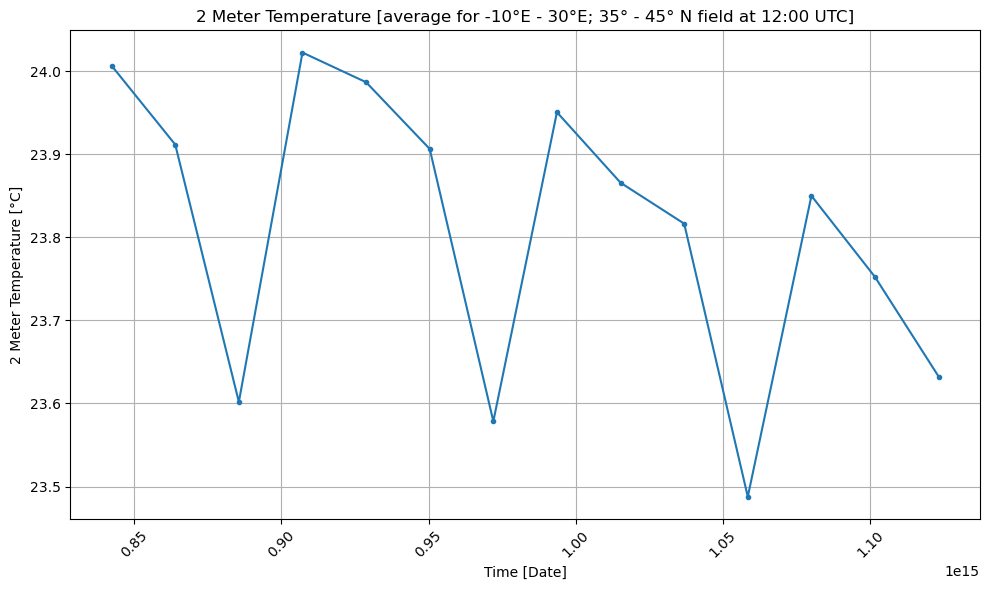

In [51]:
lon_range = slice(-10, 30)
lat_range = slice(35, 45)

# Select the temperature data for the specified latitude and longitude ranges
temperature_selected = Pangu_for_scatter['t2'].sel(longitude=lon_range, latitude=lat_range)-273.15

# Calculate the average temperature for each time step
average_temperature = temperature_selected.mean(dim=('latitude', 'longitude'))

# Convert time to a pandas datetime index for plotting
mean_temperature = average_temperature.to_pandas()

# Plot scatterplot with tiny lines
plt.figure(figsize=(10, 6))
plt.plot(mean_temperature.index, mean_temperature.values, marker='o', linestyle='-', markersize=3)
plt.xlabel('Time [Date]')
plt.ylabel('2 Meter Temperature [°C]')
plt.title('2 Meter Temperature [average for -10°E - 30°E; 35° - 45° N field at 12:00 UTC]')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.tight_layout()
plt.show()

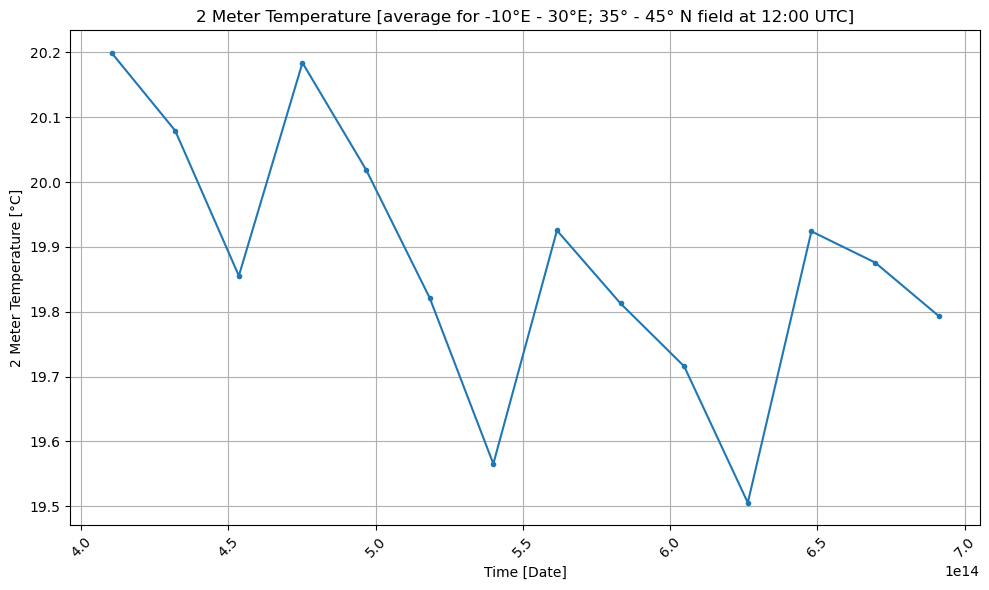

In [66]:
lon_range = slice(-10, 30)
lat_range = slice(35, 45)

# Select the temperature data for the specified latitude and longitude ranges
temperature_selected = Pangu_data_20230707['t2'].sel(longitude=lon_range)-273.15

# Calculate the average temperature for each time step
average_temperature = temperature_selected.mean(dim=('latitude', 'longitude'))

# Convert time to a pandas datetime index for plotting
mean_temperature = average_temperature.to_pandas()

# Plot scatterplot with tiny lines
plt.figure(figsize=(10, 6))
plt.plot(mean_temperature.index, mean_temperature.values, marker='o', linestyle='-', markersize=3)
plt.xlabel('Time [Date]')
plt.ylabel('2 Meter Temperature [°C]')
plt.title('2 Meter Temperature [average for -10°E - 30°E; 35° - 45° N field at 12:00 UTC]')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.tight_layout()
plt.show()

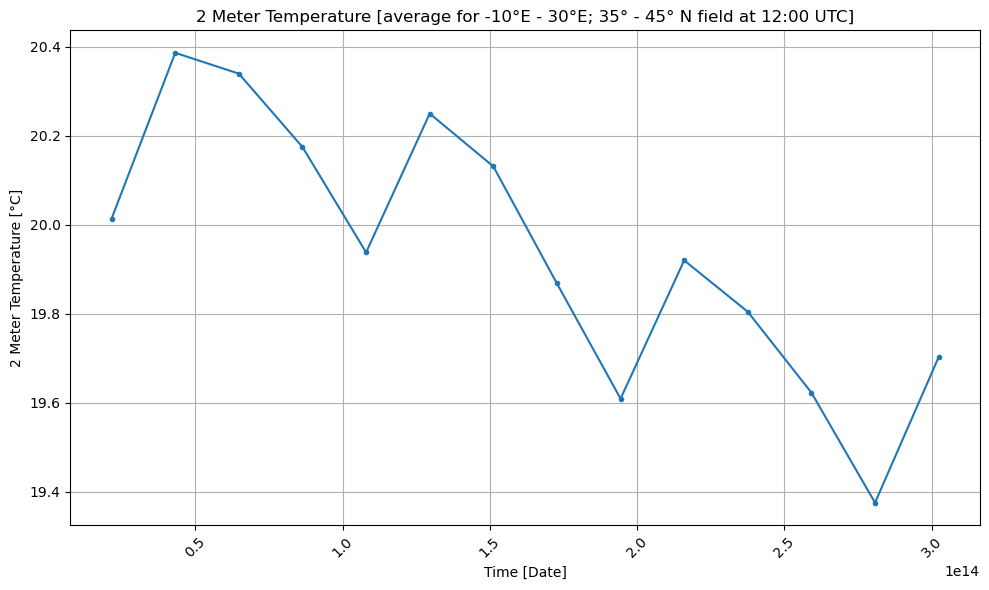

In [68]:
lon_range = slice(-10, 30)
lat_range = slice(35, 45)

# Select the temperature data for the specified latitude and longitude ranges
temperature_selected = Pangu_data_20230711['t2'].sel(longitude=lon_range)-273.15

# Calculate the average temperature for each time step
average_temperature = temperature_selected.mean(dim=('latitude', 'longitude'))

# Convert time to a pandas datetime index for plotting
mean_temperature = average_temperature.to_pandas()

# Plot scatterplot with tiny lines
plt.figure(figsize=(10, 6))
plt.plot(mean_temperature.index, mean_temperature.values, marker='o', linestyle='-', markersize=3)
plt.xlabel('Time [Date]')
plt.ylabel('2 Meter Temperature [°C]')
plt.title('2 Meter Temperature [average for -10°E - 30°E; 35° - 45° N field at 12:00 UTC]')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.tight_layout()
plt.show()

Other Things

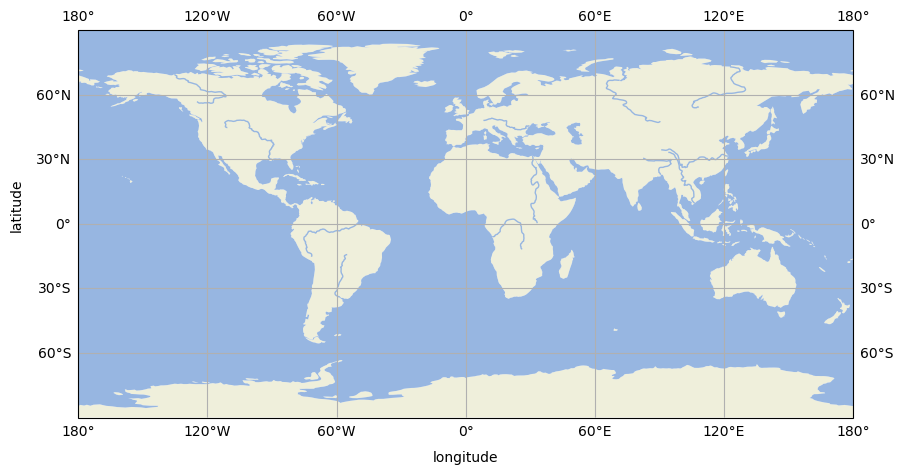

In [27]:
fig = plt.figure(figsize=[10,8])
# What are the units of the figure size? Try to find out.
#
# Geographic maps can have different projection system. 
# Now, we will specify that we want the axes of our figure in PlateCarree projection.
# We won't go into details of projection 


map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)
ax.set_extent([-180, 180, -90, 90]) # setting the borders of our map

# adding features to our map
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
#ax.add_feature(cfeature.COASTLINE)

ax.add_feature(cfeature.RIVERS)
gridlines = ax.gridlines(draw_labels=True)

#gridlines.left_labels = False
#gridlines.top_labels = False

## Note: Normal labeling doesn't work as Cartopy's labeling takeover the matplotlib commands
#ax.set_xlabel('longitude')
#ax.set_ylabel('latitude')

ax.text(-0.07, 0.55, 'latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
ax.text(0.5, -0.12, 'longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes);

In [28]:
ERA_data.t2m.sel(step=ERA_data.step[0]) 

AttributeError: 'Dataset' object has no attribute 'step'

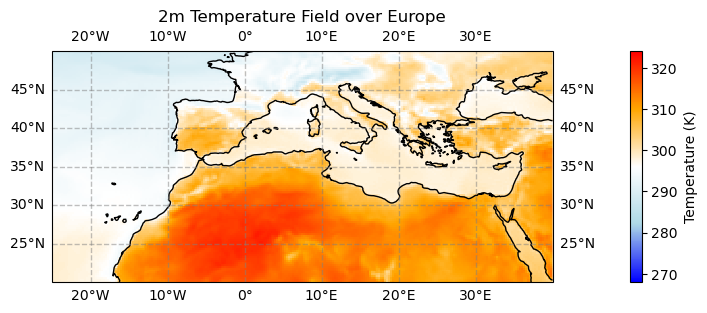

In [14]:
# Create own color ramp
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['blue', 'lightblue', 'white', 'orange', 'red'])

# Extract the temperature variable(time _ 0-8759 --> 24h*365d)
temperature = ERA_data.t2m[10,:,:]

# Create a plot with a map of Europe
plt.figure(figsize=(10, 3))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot temperature field
temperature.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, cbar_kwargs={'label': 'Temperature (K)', 'pad': 0.1})
ax.coastlines(resolution='50m')  # Add coastlines
ax.set_extent([-25, 40, 20, 50], crs=ccrs.PlateCarree())  # Set the map extent to Europe
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
plt.title('2m Temperature Field over Europe')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [20]:
# Create own color ramp
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['blue', 'lightblue', 'white', 'orange', 'red'])

# Extract the temperature variable(time _ 0-8759 --> 24h*365d)
temperature = ERA_data.q[10,:,:]

# Create a plot with a map of Europe
plt.figure(figsize=(10, 3))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot temperature field
temperature.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, cbar_kwargs={'label': 'Temperature (K)', 'pad': 0.1})
ax.coastlines(resolution='50m')  # Add coastlines
ax.set_extent([-25, 40, 20, 50], crs=ccrs.PlateCarree())  # Set the map extent to Europe
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
plt.title('2m Temperature Field over Europe')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

AttributeError: Rectangle.set() got an unexpected keyword argument 'cmap'

In [ ]:
# Define the area of interest
area = [75, -35, 35, 40]  # North, West, South, East
temp = ds_temp['t2m']
# Extract the subset for the specified area
temp_area = temp.sel(latitude=slice(area[0], area[2]), longitude=slice(area[1], area[3]))
# Calculate the mean temperature for the area for each time step
mean_temperature = temp_area.mean(dim=('latitude', 'longitude'))

In [ ]:
mean_temperature.plot()
plt.title('Aggregated Mean Temperature for Europe')
plt.xlabel('Time')
plt.ylabel('Mean Temperature (K)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
exp = ds.attrs['experiment_id']
mod = ds.attrs['source_id']

In [ ]:
da = ds['tas']

In [ ]:
weights = np.cos(np.deg2rad(da.lat))
weights.name = "weights"
da_weighted = da.weighted(weights)

In [ ]:
da_agg = da_weighted.mean(['lat', 'lon'])

In [ ]:
da_yr = da_agg.groupby('time.year').mean()

In [ ]:
da_yr = da_yr.assign_coords(model=mod)
da_yr = da_yr.expand_dims('model')
da_yr = da_yr.assign_coords(experiment=exp)
da_yr = da_yr.expand_dims('experiment')

In [ ]:
# daily temperature mean from hourly values
ds.t2m.resample(time='1D').mean()
# daily precipitation sum from hourly values
ds.tp.resample(time='1D').sum()